In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Get data for each year in html format

In [129]:
#Using requests to get the html version of webpage
html = requests.get('https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2020;type=year').content

In [130]:
#Parse the data using bs4 and pass the html 
soup = BeautifulSoup(html, 'html.parser')

In [131]:
# Formatted html
print(soup)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<!-- hostname: web06, edition-view: , country: unknown, cluster: www, created: 2022-05-02 09:18:33 -->
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://developers.facebook.com/schema/" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>
<meta content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" name="google-site-verification"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<title>2020 Cricket Team Records &amp; Stats | ESPNcricinfo.com</title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="Records,  / , 2020,  / , One-Day Internationals,  / , Match results records, stats, bowling, batting, wicket keeper" name="keywords"/>
<meta content="Read about Records,  / , 2020,  / , On

In [132]:
#Get the list of columns by looping through thead and saving the list as headers
columns = soup.find('thead')
print(columns)
headers = []
for i in columns.find_all('th'):
 title = i.text
 headers.append(title)
print(headers)

<thead>
<tr class="head">
<th class="left" nowrap="nowrap" title="team">Team 1</th>
<th class="left" nowrap="nowrap" title="team">Team 2</th>
<th class="left" nowrap="nowrap" title="winner/result">Winner</th>
<th class="left" nowrap="nowrap" title="result margin">Margin</th>
<th class="left" nowrap="nowrap" title="ground played on">Ground</th>
<th nowrap="nowrap" title="match date span">Match Date</th>
<th nowrap="nowrap" title="match scorecard">Scorecard</th>
</tr>
</thead>
['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date', 'Scorecard']


with open('dataset/one_day_cricket.csv', 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(headers) 

In [133]:
#Find all rows within the table
rows = soup.find_all('td','left')
print(rows)

rows = soup.find_all('tr', 'data1')
print(rows)

[<td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/37.html">Oman</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/27.html">U.A.E.</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/37.html">Oman</a></td>, <td class="left" nowrap="nowrap">5 wickets</td>, <td class="left"><a class="data-link" href="/ci/content/ground/1095893.html">Al Amerat</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/28.html">Namibia</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/27.html">U.A.E.</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/27.html">U.A.E.</a></td>, <td class="left" nowrap="nowrap">8 runs</td>, <td class="left"><a class="data-link" href="/ci/content/ground/1095893.html">Al Amerat</a></td>, <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/4.html">West Indie

with open('dataset/one_day_cricket.csv', 'a', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)       
    # writing the fields 
    csvwriter.writerow(headers)
    #csvwriter.writerows(row_main)
    for item in row_main:
        csvwriter.writerow(item)

In [134]:
#function to Scrap the detail score based on url passed which contains link to detail score page
def detail_scoreboard(url):
    #url = "https://stats.espncricinfo.com/ci/engine/match/1211169.html"
    #print(url)
    html = requests.get(url).content
        #Parse the data
    soup = BeautifulSoup(html, 'html.parser')
    #print(soup)
    #rows = soup.find_all("span", {"class": "ds-text-tight-l ds-font-bold"})
    rows = soup.find_all("div", {"class": "ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"})
    #for row in rows:
    detail_score = []
#<div class="ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-opacity-50 ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="United Arab Emirates Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313147.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/united-arab-emirates-27" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">United Arab Emirates</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5"></span><strong class="">170</strong></div></div><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="Oman Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313157.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/oman-37" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">Oman</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5">(37.3/50 ov) </span><strong class="">171/5</strong></div></div></div>
    for row in rows:
        columns = row.find_all("span", {"class": "ds-text-tight-l ds-font-bold"})
        for column in columns:
            x = column.text
            print(x)
            detail_score.append(x)
        columns1 = row.find_all("div", {"class": "ds-text-compact-m ds-text-typo-title"})
        for column in columns1:
            y = column.text
            print(y)
            detail_score.append(y)
    #print(detail_score)
    return detail_score #return list containing first/seconf innings team and score

In [135]:
def detail_scoreboard1(url):
    #url = "https://stats.espncricinfo.com/ci/engine/match/1211169.html"
    #print(url)
    html = requests.get(url).content
        #Parse the data
    soup = BeautifulSoup(html, 'html.parser')
    #print(soup)
    #rows = soup.find_all("span", {"class": "ds-text-tight-l ds-font-bold"})
    #rows = soup.find_all("div", {"class": "ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"})
    #print(type(rows))
    #for row in rows:
    detail_score = []
    #<div class="ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-opacity-50 ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="United Arab Emirates Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313147.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/united-arab-emirates-27" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">United Arab Emirates</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5"></span><strong class="">170</strong></div></div><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="Oman Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313157.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/oman-37" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">Oman</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5">(37.3/50 ov) </span><strong class="">171/5</strong></div></div></div>
    for row in soup.find_all("div", {"class": "ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"}):
        #columns = row.find_all("span", {"class": "ds-text-tight-l ds-font-bold"})
        '''for column in columns:
            x = column.text
            print(x)
            detail_score.append(x)'''
        detail_score.extend([column.text for column in  row.find_all("span", {"class": "ds-text-tight-l ds-font-bold"}) ]) #Changed to list comprehension with extend method
        #print(detail_score)
        #columns1 = row.find_all("div", {"class": "ds-text-compact-m ds-text-typo-title"})
        '''for column in columns1:
            y = column.text
            print(y)
            detail_score.append(y)'''
        detail_score.extend([column.text for column in row.find_all("div", {"class": "ds-text-compact-m ds-text-typo-title"}) ]) #Changed to list comprehension with extend method
        #print(detail_score)
    return detail_score

In [136]:
#function getting the summary of one day matches year by year and then passing the detail score url to detail_scoreboard function

def get_summary_match(html):
    #Parse the data
    soup = BeautifulSoup(html, 'html.parser')
    row_main = []
    rows = soup.find_all('tr', 'data1')
    #columns = soup.find_all('td')
    #print(rows)
    for row in rows:
        columns = row.find_all('td')
        #print(columns)
        row_details = []
        
        for column in columns:
            print("Column values ", column.text)
            x = column.text
            row_details.append(x)
            if "ODI #" in x:
                href_tags = row.find(  href=True, string = x)
                #print(href_tags['href'])
                complete_url = "https://stats.espncricinfo.com"+href_tags['href']
                #print(complete_url)
                detail_record = []
                detail_score = []
                #detail_record = detail_scoreboard(complete_url)
                #first_inn_team, second_inn_team = detail_scoreboard(complete_url)
                detail_score = detail_scoreboard1(complete_url)
                
                #print(detail_record)
                #print(detail_score)
                #row_details.append(first_inn_team)
                #row_details.append(second_inn_team)
                row_details = row_details + detail_score
                
        #print('\n')
        #print(row_details)
        #row_details= row_details + detail_record
        row_main.append(row_details)
        #row_main = row_main + detail_record
        #row_main.append
    print(row_main)
    file_writing('one_day_cricket.csv','a', row_main)
def file_writing( filename, append_write, row_data):
    #with open('dataset/one_day_cricket.csv', 'a', newline='') as csvfile:
    with open('dataset/' + filename, append_write, newline='') as csvfile:
    # creating a csv writer object 
        csvwriter = csv.writer(csvfile)       
        # writing the fields 
        #csvwriter.writerow(headers)
        #csvwriter.writerows(row_main)
        #for item in row_main:
        for item in row_data:
            csvwriter.writerow(item)

In [137]:
#Get headers and writing the headers to csv file
def get_header(html):
    #Parse the data
    #print("Inside file_header_writing ")
    soup = BeautifulSoup(html, 'html.parser')
    #row_main = []
    #rows = soup.find_all('tr', 'data1')
    #columns = soup.find_all('td')
    #print(rows)
    columns = soup.find('thead')
    #print(columns)
    headers = []
    headers.extend([i.text for i in  columns.find_all('th') ]) #Changed to list comprehension with extend method
    '''for i in columns.find_all('th'):
        title = i.text
        headers.extend(title)'''
    #print(headers)
    #headers = headers + detail_columns
    #detail_columns = ['First_Innings_Team','Second_Innings_Team', 'First_Innings_Score','Second_Innings_Score']
    headers.extend(['First_Innings_Team','Second_Innings_Team', 'First_Innings_Score','Second_Innings_Score'])
    #print(headers)
    file_writing('one_day_cricket.csv','a', [headers])
    '''with open('dataset/one_day_cricket.csv', 'a', newline='') as csvfile: 
    # creating a csv writer object 
        csvwriter = csv.writer(csvfile)       
        # writing the fields 
        csvwriter.writerow(headers)'''

#Main calling function


year = 1971
html = requests.get('https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id='+str(year)+';type=year').content
#print(html)
get_header(html)
for year in range(1971, 1973):
    print("Extracting data of year: ",year)
    html = requests.get('https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id='+str(year)+';type=year').content
    get_summary_match(html)
    #print(html)

In [3]:
df = pd.read_csv('dataset/one_day_cricket.csv')

In [4]:
#Jupyter formatting

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [140]:
print(df.head())

        Team 1     Team 2       Winner     Margin        Ground    Match Date Scorecard First_Innings_Team Second_Innings_Team First_Innings_Score       Second_Innings_Score
0    Australia    England    Australia  5 wickets     Melbourne   Jan 5, 1971   ODI # 1            England           Australia                 190         (34.6/40 ov) 191/5
1      England  Australia      England  6 wickets    Manchester  Aug 24, 1972   ODI # 2          Australia             England               222/8  (49.1/55 ov, T:223) 226/4
2      England  Australia    Australia  5 wickets        Lord's  Aug 26, 1972   ODI # 3            England           Australia               236/9  (51.3/55 ov, T:237) 240/5
3      England  Australia      England  2 wickets    Birmingham  Aug 28, 1972   ODI # 4          Australia             England               179/9         (51.3/55 ov) 180/8
4  New Zealand   Pakistan  New Zealand    22 runs  Christchurch  Feb 11, 1973   ODI # 5        New Zealand            Pakistan    

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team 1                4389 non-null   object
 1   Team 2                4389 non-null   object
 2   Winner                4389 non-null   object
 3   Margin                4191 non-null   object
 4   Ground                4389 non-null   object
 5   Match Date            4389 non-null   object
 6   Scorecard             4389 non-null   object
 7   First_Innings_Team    4389 non-null   object
 8   Second_Innings_Team   4389 non-null   object
 9   First_Innings_Score   4384 non-null   object
 10  Second_Innings_Score  4297 non-null   object
dtypes: object(11)
memory usage: 377.3+ KB


In [5]:
#Setting scorecard column as index
df.set_index('Scorecard', inplace = True)

In [143]:
df.shape #4389

(4389, 10)

In [6]:
#Rename columns
df.rename(columns = {'Team 1':'Team1', 'Team 2':'Team2', 'Match Date':'Match_Date'}, inplace = True)

In [7]:
#convert object to string datatypes
df = df.astype({"Team1": "string","Team2": "string", "Margin":"string", "Match_Date":"string", "Winner":"string", "Ground":"string", "First_Innings_Team":"string", "Second_Innings_Team":"string", "First_Innings_Score":"string", "Second_Innings_Score":"string"}, errors='raise') 

In [8]:
#df["Team 1"] = df["Team 1"].astype("string")
df.dtypes

Team1                   string
Team2                   string
Winner                  string
Margin                  string
Ground                  string
Match_Date              string
First_Innings_Team      string
Second_Innings_Team     string
First_Innings_Score     string
Second_Innings_Score    string
dtype: object

### Checking null values and then dropping the rows with null values i.e. dropping rows with abondoned macthes

In [147]:

df.isna().sum()

Team1                     0
Team2                     0
Winner                    0
Margin                  198
Ground                    0
Match_Date                0
First_Innings_Team        0
Second_Innings_Team       0
First_Innings_Score       5
Second_Innings_Score     92
dtype: int64

In [148]:
df[df['Margin'].isna()]
df[df['Margin'].isnull()]
df[df.Margin.isnull()]

,Team1,Team2,Winner,Margin,Ground,Match_Date,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score
Scorecard,,,,,,,,,,
ODI # 7,England,New Zealand,no result,<NA>,Manchester,"Jul 20, 1973",England,New Zealand,(48.3/55 ov) 167/8,<NA>
ODI # 17,New Zealand,England,no result,<NA>,Dunedin,"Mar 8, 1975",England,New Zealand,136,"(4/35 ov, T:137) 15/0"
ODI # 18,New Zealand,England,no result,<NA>,Wellington,"Mar 9, 1975",New Zealand,England,227,"(10/35 ov, T:228) 35/1"
ODI # 56,Pakistan,India,Pakistan,<NA>,Sahiwal,"Nov 3, 1978",Pakistan,India,205/7,"(37.4/40 ov, T:206) 183/2"
ODI # 57,Australia,England,no result,<NA>,Sydney,"Jan 13, 1979",Australia,England,(7.2/40 ov) 17/1,<NA>
...,...,...,...,...,...,...,...,...,...,...
ODI # 4301,Ireland,South Africa,no result,<NA>,Dublin (Malahide),"Jul 11, 2021",Ireland,South Africa,(40.2/40.2 ov) 195/4,<NA>
ODI # 4321,Ireland,Zimbabwe,no result,<NA>,Belfast,"Sep 10, 2021",Ireland,Zimbabwe,(50 ov) 282/8,<NA>
ODI # 4335,Oman,Scotland,no result,<NA>,Al Amerat,"Oct 2, 2021",Scotland,Oman,(23.2/50 ov) 100/3,<NA>


In [149]:
df.query('Margin.isna()', engine='python' )

,Team1,Team2,Winner,Margin,Ground,Match_Date,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score
Scorecard,,,,,,,,,,
ODI # 7,England,New Zealand,no result,<NA>,Manchester,"Jul 20, 1973",England,New Zealand,(48.3/55 ov) 167/8,<NA>
ODI # 17,New Zealand,England,no result,<NA>,Dunedin,"Mar 8, 1975",England,New Zealand,136,"(4/35 ov, T:137) 15/0"
ODI # 18,New Zealand,England,no result,<NA>,Wellington,"Mar 9, 1975",New Zealand,England,227,"(10/35 ov, T:228) 35/1"
ODI # 56,Pakistan,India,Pakistan,<NA>,Sahiwal,"Nov 3, 1978",Pakistan,India,205/7,"(37.4/40 ov, T:206) 183/2"
ODI # 57,Australia,England,no result,<NA>,Sydney,"Jan 13, 1979",Australia,England,(7.2/40 ov) 17/1,<NA>
...,...,...,...,...,...,...,...,...,...,...
ODI # 4301,Ireland,South Africa,no result,<NA>,Dublin (Malahide),"Jul 11, 2021",Ireland,South Africa,(40.2/40.2 ov) 195/4,<NA>
ODI # 4321,Ireland,Zimbabwe,no result,<NA>,Belfast,"Sep 10, 2021",Ireland,Zimbabwe,(50 ov) 282/8,<NA>
ODI # 4335,Oman,Scotland,no result,<NA>,Al Amerat,"Oct 2, 2021",Scotland,Oman,(23.2/50 ov) 100/3,<NA>


In [150]:
df.query('Margin.isna() and Second_Innings_Score.isna()', engine='python' ).shape # to confirm that all abondened matches dont have second innings score

(92, 10)

In [151]:
df.shape
#Before dropna 4389

(4389, 10)

In [9]:
df.isna().sum()
#NA rows 198

Team1                     0
Team2                     0
Winner                    0
Margin                  198
Ground                    0
Match_Date                0
First_Innings_Team        0
Second_Innings_Team       0
First_Innings_Score       5
Second_Innings_Score     92
dtype: int64

In [10]:
#Drop any row with null value in any of the column
df.dropna(inplace = True)

In [154]:
df.shape
#After dropna 4191 i.e. 4389 - 198

(4191, 10)

In [155]:
##Check Team1 == First_innings_team or Second_innings_team and Team2 == First_innings_team or Second_innings_team before dropping team1 and team2
#df.query("Team1 == str(First_Innings_Team) | Team1 == str(Second_Innings_Team)")
df.query("Team1 != First_Innings_Team and Team1 != Second_Innings_Team", engine='python').shape
df.query("Team2 != First_Innings_Team and Team2 != Second_Innings_Team", engine='python').shape

(82, 10)

In [11]:
#Drop duplicate columns Team1 and Team2
df.drop(['Team1', 'Team2'], axis = 1, inplace = True)

In [12]:
df.shape
#df.columns(['First_Innings_Team', 'Second_Innings_Team', 'First_Innings_Score', 'Second_Innings_Score', 'Winner', 'Margin', 'Ground', 'Match_Date'])
#df
#Rearrange columns
df = df[['First_Innings_Team', 'Second_Innings_Team', 'First_Innings_Score', 'Second_Innings_Score', 'Winner', 'Margin', 'Ground', 'Match_Date']]

In [13]:
df_modified = df[df['Match_Date'].str.contains("-")]
df[df['Match_Date'].str.contains("-")]

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date
Scorecard,,,,,,,,
ODI # 13,India,England,171,(48.5/55 ov) 172/4,England,6 wickets,The Oval,"Jul 15-16, 1974"
ODI # 38,West Indies,England,221,"(45.3/50 ov, T:222) 185",West Indies,36 runs,Lord's,"Aug 28-29, 1976"
ODI # 39,West Indies,England,223/9,"(31.4/32 ov, T:224) 173",West Indies,50 runs,Birmingham,"Aug 30-31, 1976"
ODI # 50,England,Pakistan,217/7,"(47/55 ov, T:218) 85",England,132 runs,Manchester,"May 24-25, 1978"
ODI # 66,Pakistan,Australia,286/7,"(57.1/60 ov, T:287) 197",Pakistan,89 runs,Nottingham,"Jun 13-14, 1979"
ODI # 67,Canada,England,45,(13.5/60 ov) 46/2,England,8 wickets,Manchester,"Jun 13-14, 1979"
ODI # 68,Sri Lanka,India,238/5,"(54.1/60 ov, T:239) 191",Sri Lanka,47 runs,Manchester,"Jun 16-18, 1979"
ODI # 89,West Indies,England,198,"(51.2/55 ov, T:199) 174",West Indies,24 runs,Leeds,"May 28-29, 1980"
ODI # 200,India,West Indies,262/8,"(54.1/60 ov, T:263) 228",India,34 runs,Manchester,"Jun 9-10, 1983"


In [14]:
for idx, row in df_modified.iterrows():
    print(row['Match_Date'])
    temp = row['Match_Date']
    #print(row['Match_Date'].find('-'))
    end = row['Match_Date'].find('-')
    #print(temp[:end])
    
    #print(row['Match_Date'].find(','))
    start = row['Match_Date'].find(',')
    #print(temp[start:])
    new_string = temp[:end] + temp[start:]
    print(new_string)
    df.at[idx,'Match_Date'] = new_string

Jul 15-16, 1974
Jul 15, 1974
Aug 28-29, 1976
Aug 28, 1976
Aug 30-31, 1976
Aug 30, 1976
May 24-25, 1978
May 24, 1978
Jun 13-14, 1979
Jun 13, 1979
Jun 13-14, 1979
Jun 13, 1979
Jun 16-18, 1979
Jun 16, 1979
May 28-29, 1980
May 28, 1980
Jun 9-10, 1983
Jun 9, 1983
Jun 11-12, 1983
Jun 11, 1983
Jun 11-12, 1983
Jun 11, 1983
Oct 12-13, 1987
Oct 12, 1987
Oct 18-19, 1987
Oct 18, 1987
May 23-24, 1988
May 23, 1988
May 23-24, 1991
May 23, 1991
Mar 21-22, 1993
Mar 21, 1993
Aug 27-28, 1994
Aug 27, 1994
Feb 23-24, 1995
Feb 23, 1995
May 24-25, 1995
May 24, 1995
May 26-27, 1996
May 26, 1996
May 29-30, 1999
May 29, 1999
Jan 8-9, 2000
Jan 8, 2000
May 30-31, 2000
May 30, 2000
Feb 17-18, 2001
Feb 17, 2001
Sep 10-11, 2004
Sep 10, 2004
Sep 14-15, 2004
Sep 14, 2004
Sep 17-18, 2004
Sep 17, 2004
Sep 18-19, 2004
Sep 18, 2004
Mar 27-28, 2007
Mar 27, 2007
Jul 3-4, 2010
Jul 3, 2010
Jul 11-12, 2012
Jul 11, 2012
Jul 2-3, 2013
Jul 2, 2013
Jul 7-8, 2013
Jul 7, 2013
Dec 10-11, 2014
Dec 10, 2014
Jul 9-10, 2019
Jul 9, 2019
J

In [161]:
df

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date
Scorecard,,,,,,,,
ODI # 1,England,Australia,190,(34.6/40 ov) 191/5,Australia,5 wickets,Melbourne,"Jan 5, 1971"
ODI # 2,Australia,England,222/8,"(49.1/55 ov, T:223) 226/4",England,6 wickets,Manchester,"Aug 24, 1972"
ODI # 3,England,Australia,236/9,"(51.3/55 ov, T:237) 240/5",Australia,5 wickets,Lord's,"Aug 26, 1972"
ODI # 4,Australia,England,179/9,(51.3/55 ov) 180/8,England,2 wickets,Birmingham,"Aug 28, 1972"
ODI # 5,New Zealand,Pakistan,187,"(33.3/40 ov, T:188) 165",New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...,...
ODI # 4385,Scotland,Oman,215,"(49.4/50 ov, T:216) 211",Scotland,4 runs,Dubai (DSC),"Apr 10, 2022"
ODI # 4386,Papua New Guinea,Oman,224/9,"(44.1/50 ov, T:225) 227/3",Oman,7 wickets,Dubai (DSC),"Apr 12, 2022"
ODI # 4387,Scotland,Papua New Guinea,287/5,"(36.2/50 ov, T:288) 164",Scotland,123 runs,Dubai (DSC),"Apr 13, 2022"


In [15]:
#Convert Match_Date to datetime
df['Match_Date'] = pd.to_datetime(df['Match_Date'], format='%b %d, %Y')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4191 entries, ODI # 1 to ODI # 4389
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   First_Innings_Team    4191 non-null   string        
 1   Second_Innings_Team   4191 non-null   string        
 2   First_Innings_Score   4191 non-null   string        
 3   Second_Innings_Score  4191 non-null   string        
 4   Winner                4191 non-null   string        
 5   Margin                4191 non-null   string        
 6   Ground                4191 non-null   string        
 7   Match_Date            4191 non-null   datetime64[ns]
dtypes: datetime64[ns](1), string(7)
memory usage: 423.7+ KB


In [164]:
df['Match_Date'].agg(['max', 'min'])

max   2022-04-16
min   1971-01-05
Name: Match_Date, dtype: datetime64[ns]

In [17]:
#Create new column as Match_Year containing the year of the match played
df['Match_Year'] = df['Match_Date'].dt.year

In [418]:
df.groupby('Match_Year').Match_Year.agg(['count']).head()

,count
Match_Year,
1971,1
1972,3
1973,4
1974,6
1975,17


In [167]:
#Modified_df to write to csv and hence reset the index i.e. bring Scorecard as column
modified_df = df.reset_index()

In [168]:
#Creating clean file
modified_df.to_csv('dataset/clean_one_day_cricket.csv', index = False)

In [169]:
df.Winner.unique()

<StringArray>
[   'Australia',      'England',  'New Zealand',  'West Indies',
     'Pakistan',        'India',    'Sri Lanka',     'Zimbabwe',
 'South Africa',        'Kenya',       'U.A.E.',   'Bangladesh',
       'Canada',  'Netherlands', 'ICC World XI',    'Africa XI',
      'Asia XI',      'Bermuda',      'Ireland',     'Scotland',
  'Afghanistan',       'P.N.G.',    'Hong Kong',        'Nepal',
      'Namibia',         'Oman',       'U.S.A.']
Length: 27, dtype: string

In [419]:
# Query to check records where Winner team has different name then first or second team name
df.query('First_Innings_Team != Winner and Second_Innings_Team != Winner', engine = 'python').head()
#df.query('First_Innings_Team != Winner and Second_Innings_Team != Winner and Winner == "U.A.E."', engine = 'python')
#df.query('First_Innings_Team != Winner and Second_Innings_Team != Winner and Winner == "P.N.G."', engine = 'python')
#df.query('First_Innings_Team != Winner and Second_Innings_Team != Winner and Winner == "U.S.A."', engine = 'python')

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date,Match_Year
Scorecard,,,,,,,,,


In [18]:
df['Winner'] = np.where((df['First_Innings_Team'] != df['Winner']) & (df['Second_Innings_Team'] != df['Winner']) & (df['Winner'] == 'U.A.E.'), 'United Arab Emirates', df['Winner'])

In [19]:
df['Winner'] = np.where((df['First_Innings_Team'] != df['Winner']) & (df['Second_Innings_Team'] != df['Winner']) & (df['Winner'] == 'P.N.G.'), 'Papua New Guinea', df['Winner'])

In [20]:
df['Winner'] = np.where((df['First_Innings_Team'] != df['Winner']) & (df['Second_Innings_Team'] != df['Winner']) & (df['Winner'] == 'U.S.A.'), 'United States of America', df['Winner'])

In [174]:
df.query('First_Innings_Team != Winner and Second_Innings_Team != Winner', engine = 'python')

,First_Innings_Team,Second_Innings_Team,First_Innings_Score,Second_Innings_Score,Winner,Margin,Ground,Match_Date,Match_Year
Scorecard,,,,,,,,,


In [ ]:
df['Winner']. unique()

In [ ]:
#Limit the data to only test playing countries or former test playing counties
#df_test_playing = df[df['Winner'].isin(['England', 'Australia', 'New Zealand', 'Pakistan', 'India', 'West Indies', 'Sri Lanka', 'Zimbabwe', 'South Africa', 'Bangladesh', 'Afghanistan'] )]

### Creating a summary dataframe df_total using method 1 i.e. melt and Crosstab

In [73]:
#https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe
#Melt and cross tab is use to get the count of number of matches played by each team as first_innings or second _innings and total win

df1 = df[['First_Innings_Team', 'Second_Innings_Team', 'Winner']].melt(var_name='Innings', value_name='Team')

In [49]:
df1[df1['Team'] == 'East Africa']

,Innings,Team
20,First_Innings_Team,East Africa
4207,Second_Innings_Team,East Africa
4214,Second_Innings_Team,East Africa


In [74]:
df_total = pd.crosstab(index=df1['Team'], columns=df1['Innings']).reset_index(drop = False)

In [1120]:
#df_total = pd.crosstab(index=df1['Team'], columns=df1['Innings'])
#df_total.reset_index(drop = False, inplace = True)
#df_total.rename(columns = {'Team':'Team'}, inplace = True)

In [75]:
#Removing the additinal label on index
df_total.columns.name = None

In [78]:
df_total['Total_match'] = df_total['First_Innings_Team'] + df_total['Second_Innings_Team']

KeyError: 'First_Innings_Team'

In [79]:
#Rename columns
df_total.rename(columns = {'First_Innings_Team':'First_Innings_count', 'Second_Innings_Team':'Second_Innings_count', 'Winner':'Winner_count'}, inplace = True)
#df_total.reset_index(inplace = True)

In [80]:
df_total['Win_percentage'] = (df_total['Winner_count'] *100)/df_total['Total_match']

In [81]:
df_total['Win_percentage'] = df_total['Win_percentage'].round(2)

In [1030]:
#df_total.drop('index', axis = 1, inplace = True)
#df_total.reset_index(inplace = True)
#df_total.sort_values('Team', inplace = True)
#df_total.reset_index( inplace=True)
#df_total.drop('Innings', axis = 1, inplace = True)

In [82]:
df_total.head()

,Team,First_Innings_count,Second_Innings_count,Winner_count,Total_match,Win_percentage
0,Afghanistan,67,64,66,131,50.38
1,Africa XI,1,4,1,5,20.00
2,Asia XI,4,2,4,6,66.67
3,Australia,515,402,582,917,63.47
4,Bangladesh,197,190,140,387,36.18


In [83]:
#Subset of df_total with only current or former test playing countries
Test_playing_list = ['England', 'Australia', 'New Zealand', 'Pakistan', 'India', 'West Indies', 'Sri Lanka', 'Zimbabwe', 'South Africa', 'Bangladesh', 'Afghanistan']
#df_total.query("Team == 'England'")
#df_total.query('Team == @Test_playing_list')
df_total_test_playing = df_total[df_total['Team'].isin(Test_playing_list)].reset_index(drop = True)
df_total_test_playing

,Team,First_Innings_count,Second_Innings_count,Winner_count,Total_match,Win_percentage
0,Afghanistan,67,64,66,131,50.38
1,Australia,515,402,582,917,63.47
2,Bangladesh,197,190,140,387,36.18
3,England,348,374,384,722,53.19
4,India,444,505,520,949,54.79
5,New Zealand,377,354,357,731,48.84
6,Pakistan,471,435,489,906,53.97
7,South Africa,303,312,392,615,63.74
8,Sri Lanka,422,404,394,826,47.70
9,West Indies,356,441,406,797,50.94


0
AxesSubplot(0.125,0.125;0.352273x0.755)
1
AxesSubplot(0.547727,0.125;0.352273x0.755)


<function matplotlib.pyplot.show(close=None, block=None)>

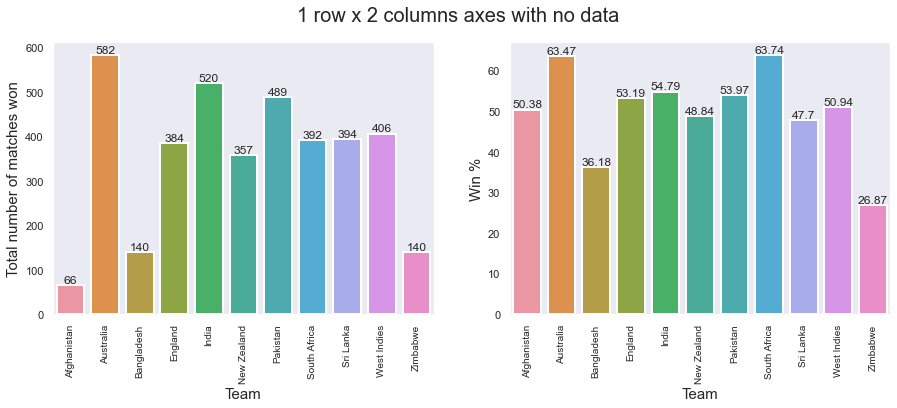

In [353]:
#count plot showing the number of matches played year year since 1971

sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False, sharex = True)
for i, ax1 in zip(range(10), ax.flat):
    print(i)
    print(ax1)
fig.suptitle('1 row x 2 columns axes with no data', fontsize=20)
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.barplot(data = df_total_test_playing, x = 'Team', y='Winner_count', linewidth = 2, ax=ax[0])
#g = sns.catplot(data = df_total, x = 'Team', y='First_Innings_Team', kind = "bar", height=6, aspect=15/6, linewidth = 2)
#g = df_total_test_playing.plot(x= 'Team', y=['Winner_count', 'First_Innings_count', 'Second_Innings_count', 'Total_match'], figsize = (20,9), kind = 'bar', stacked = False)
ax[0].set_xticklabels(ax[0].get_xticklabels(), size = 10, rotation = 90)
#ax[0].set(xlabel = "Team", ylabel = "Total number of matches won")
ax[0].set_xlabel("Team", size = 15)
ax[0].set_ylabel("Total number of matches won", size = 15)

ax[0].bar_label(ax[0].containers[0])


g = sns.barplot(data = df_total_test_playing, x = 'Team', y='Win_percentage', linewidth = 2, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), size = 10, rotation = 90)
#ax[0].set(xlabel = "Team", ylabel = "Total number of matches won")
ax[1].set_xlabel("Team", size = 15)
ax[1].set_ylabel("Win %", size = 15)

ax[1].bar_label(ax[1].containers[0])

#plt.xticks(rotation = 90)




#plt.grid()
plt.show

0
AxesSubplot(0.125,0.125;0.133621x0.755)
1
AxesSubplot(0.285345,0.125;0.133621x0.755)
2
AxesSubplot(0.44569,0.125;0.133621x0.755)
3
AxesSubplot(0.606034,0.125;0.133621x0.755)
4
AxesSubplot(0.766379,0.125;0.133621x0.755)


<function matplotlib.pyplot.show(close=None, block=None)>

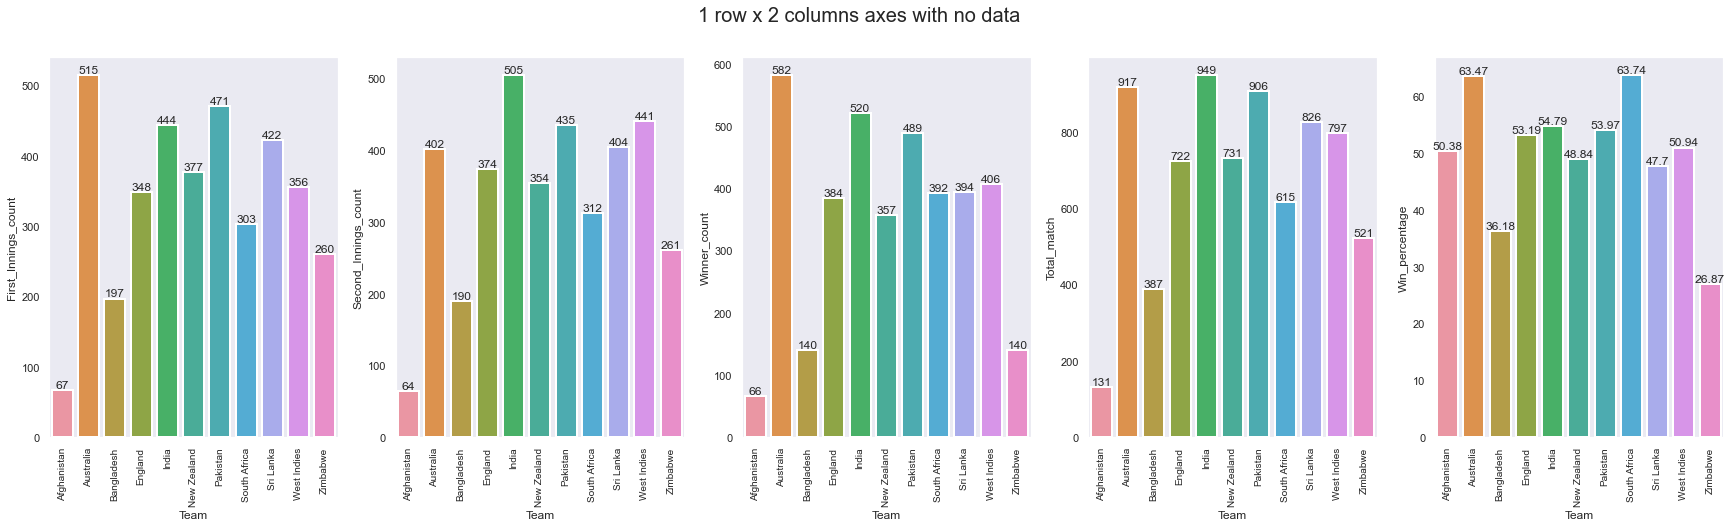

In [362]:
#count plot showing the number of matches played year year since 1971

sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
fig, ax = plt.subplots(1, 5, figsize=(30, 7), sharey=False, sharex = True)
for i, ax1 in zip(range(10), ax.flat):
    print(i)
    print(ax1)
    sns.barplot(data = df_total_test_playing, x = 'Team', y=df_total_test_playing.iloc[:,i+1], linewidth = 2, ax=ax1)
    ax1.bar_label(ax1.containers[0])
    ax1.set_xticklabels(ax1.get_xticklabels(), size = 10, rotation = 90)
fig.suptitle('1 row x 2 columns axes with no data', fontsize=20)
#sns.set(rc = {'figure.figsize':(200,100)})
#g = sns.barplot(data = df_total_test_playing, x = 'Team', y='Winner_count', linewidth = 2, ax=ax[0])
#g = sns.catplot(data = df_total, x = 'Team', y='First_Innings_Team', kind = "bar", height=6, aspect=15/6, linewidth = 2)
#g = df_total_test_playing.plot(x= 'Team', y=['Winner_count', 'First_Innings_count', 'Second_Innings_count', 'Total_match'], figsize = (20,9), kind = 'bar', stacked = False)
#ax[0].set_xticklabels(ax[0].get_xticklabels(), size = 10, rotation = 90)
#ax[0].set(xlabel = "Team", ylabel = "Total number of matches won")
#ax[0].set_xlabel("Team", size = 15)
#ax[0].set_ylabel("Total number of matches won", size = 15)

#ax[0].bar_label(ax[0].containers[0])


#g = sns.barplot(data = df_total_test_playing, x = 'Team', y='Win_percentage', linewidth = 2, ax=ax[1])
#ax[1].set_xticklabels(ax[1].get_xticklabels(), size = 10, rotation = 90)
#ax[0].set(xlabel = "Team", ylabel = "Total number of matches won")
#ax[1].set_xlabel("Team", size = 15)
#ax[1].set_ylabel("Win %", size = 15)

#ax[1].bar_label(ax[1].containers[0])

#plt.xticks(rotation = 90)




#plt.grid()
plt.show

In [422]:
df2 = df1[df1['Innings'] != 'Winner']

In [423]:
df2.query('Team == "Afghanistan"').value_counts()

Innings              Team       
First_Innings_Team   Afghanistan    67
Second_Innings_Team  Afghanistan    64
dtype: int64

In [424]:
df3 = df2.groupby('Team', as_index=True)['Innings'].count().reset_index().rename(columns = {'Innings':'Total_matches'})

In [425]:
df3.head()

,Team,Total_matches
0,Afghanistan,131
1,Africa XI,5
2,Asia XI,6
3,Australia,917
4,Bangladesh,387


In [428]:
df2.head()

,Innings,Team
0,First_Innings_Team,England
1,First_Innings_Team,Australia
2,First_Innings_Team,England
3,First_Innings_Team,Australia
4,First_Innings_Team,New Zealand


In [429]:
df.First_Innings_Team.value_counts().to_frame().reset_index().rename(columns={'index': 'First_Innings_Team', 'First_Innings_Team': 'First_Innings_Count'}).head()

,First_Innings_Team,First_Innings_Count
0,Australia,515
1,Pakistan,471
2,India,444
3,Sri Lanka,422
4,New Zealand,377


In [430]:
df.Second_Innings_Team.value_counts().to_frame().reset_index().rename(columns={'index': 'Second_Innings_Team', 'Second_Innings_Team': 'Second_Innings_Count'}).head()

,Second_Innings_Team,Second_Innings_Count
0,India,505
1,West Indies,441
2,Pakistan,435
3,Sri Lanka,404
4,Australia,402


In [432]:
df_first = df[['First_Innings_Team']].value_counts().reset_index(name='First_Innings_count')

In [433]:
type(df_first)
df_first.set_index('First_Innings_Team', inplace = True)
df_first.head()

,First_Innings_count
First_Innings_Team,
Australia,515
Pakistan,471
India,444
Sri Lanka,422
New Zealand,377


In [434]:
df_second = df[['Second_Innings_Team']].value_counts().reset_index(name='Second_Innings_count')

In [435]:
type(df_second)
df_second.set_index('Second_Innings_Team', inplace = True)
df_second.head()

,Second_Innings_count
Second_Innings_Team,
India,505
West Indies,441
Pakistan,435
Sri Lanka,404
Australia,402


In [439]:
df_winner = df[['Winner']].value_counts().reset_index(name='Winner_count')

In [440]:
df_winner.set_index('Winner', inplace = True)
df_winner.head()

,Winner_count
Winner,
Australia,582
India,520
Pakistan,489
West Indies,406
Sri Lanka,394


In [442]:
df_second
df_first_second = pd.merge(df_first, df_second, left_index = True, right_index = True)
df_first_second.head()

,First_Innings_count,Second_Innings_count
Australia,515,402
Pakistan,471,435
India,444,505
Sri Lanka,422,404
New Zealand,377,354


In [443]:
df_complete = pd.merge(df_first_second, df_winner, left_index = True, right_index = True, how = 'left')

In [444]:
df_complete.head()

,First_Innings_count,Second_Innings_count,Winner_count
Australia,515,402,582.0
Pakistan,471,435,489.0
India,444,505,520.0
Sri Lanka,422,404,394.0
New Zealand,377,354,357.0


In [445]:

df_complete['Total_match'] = df_complete['First_Innings_count'] + df_complete['Second_Innings_count']

In [446]:
df_complete['Winner_count'].fillna(0, inplace = True)

In [447]:
df_complete['Winner_count'] = df_complete['Winner_count'].astype('int64')
df_complete.info()
#df_complete['Total_match'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Australia to East Africa
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   First_Innings_count   28 non-null     int64
 1   Second_Innings_count  28 non-null     int64
 2   Winner_count          28 non-null     int64
 3   Total_match           28 non-null     int64
dtypes: int64(4)
memory usage: 2.1+ KB


In [448]:

df_complete = df_complete.reset_index().rename(columns = {'index':'Team'})

In [449]:
df_complete.sort_values('Team', inplace = True)

In [450]:
df_complete.reset_index(drop=True, inplace=True)

In [451]:
df_complete.sort_values('Team', inplace = True)

In [453]:
df_complete.head()

,Team,First_Innings_count,Second_Innings_count,Winner_count,Total_match
0,Afghanistan,67,64,66,131
1,Africa XI,1,4,1,5
2,Asia XI,4,2,4,6
3,Australia,515,402,582,917
4,Bangladesh,197,190,140,387


In [455]:
#df_complete.compare(df_total)

In [457]:
#df_complete[df_complete == df_total]

In [458]:
df_complete.equals(df_total)

False

,Team,First_Innings_count,Second_Innings_count,Winner_count,Total_match,Win_percentage
0,Afghanistan,67,64,66,131,50.38
1,Africa XI,1,4,1,5,20.00
2,Asia XI,4,2,4,6,66.67
3,Australia,515,402,582,917,63.47
4,Bangladesh,197,190,140,387,36.18
5,Bermuda,19,16,7,35,20.00
6,Canada,38,37,17,75,22.67
7,East Africa,1,2,0,3,0.00
8,England,348,374,384,722,53.19
9,Hong Kong,14,11,9,25,36.00


<function matplotlib.pyplot.show(close=None, block=None)>

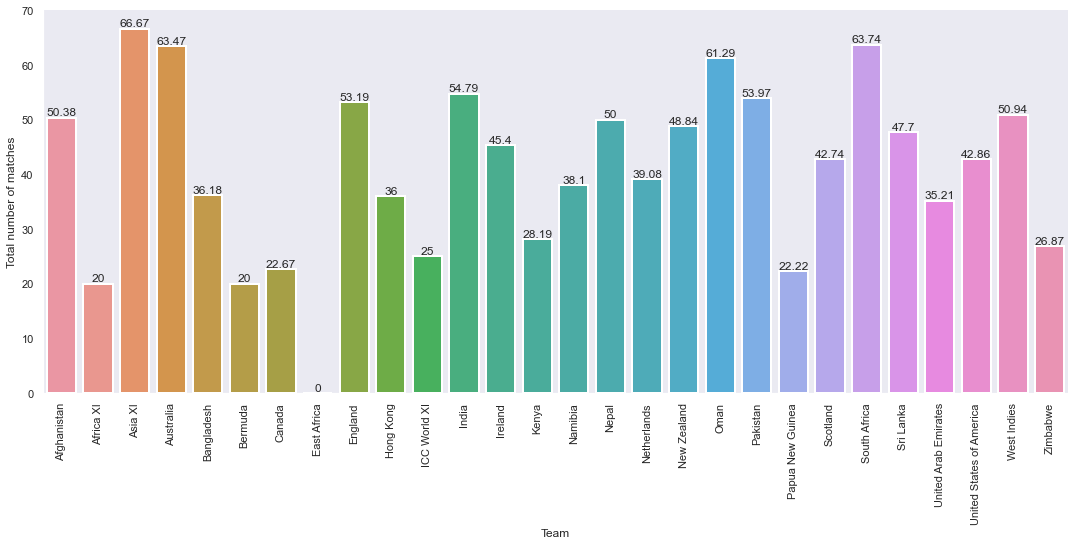

In [981]:
#count plot showing the number of matches played year year since 1971

sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
#g = sns.catplot(data = df_total, x = 'Team', y='Winner', kind = "bar", height=6, aspect=15/6, linewidth = 2)
#g = sns.catplot(data = df_total, x = 'Team', y='First_Innings_Team', kind = "bar", height=6, aspect=15/6, linewidth = 2)
g = sns.catplot(data = df_total, x= 'Team', y='Win_percentage', kind = 'bar', height=6, aspect=15/6, linewidth = 2)
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])

g.set(xlabel = "Team", ylabel = "Total number of matches")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

In [947]:
df_total["Winner_count"].sum()

4191

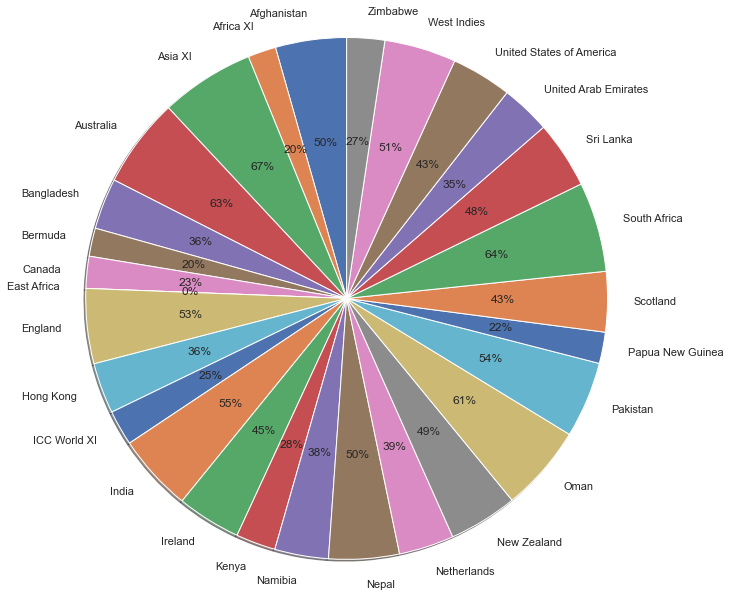

In [970]:
#df_total.plot(kind='pie', y='Winner_count', autopct='%1.0f%%')
total = df_total["Win_percentage"].sum()
my_explode = (0, 0.1, 0)
plt.pie(df_total["Win_percentage"],radius=3, labels = df_total["Team"], autopct=lambda p: '{:.0f}%'.format(p * total / 100), shadow=True, startangle=90)

#sns.despine(left=True, bottom=True)
plt.show()







In [200]:
df.groupby(['Winner', 'Match_Year'])['Winner'].count()

Winner       Match_Year
Afghanistan  2009          2
             2010          7
             2011          2
             2012          1
             2013          4
                          ..
Zimbabwe     2017          6
             2018          5
             2019          4
             2021          1
             2022          1
Name: Winner, Length: 528, dtype: int64

In [201]:
df[['Winner', 'Match_Year']].value_counts().sort_index()

Winner       Match_Year
Afghanistan  2009          2
             2010          7
             2011          2
             2012          1
             2013          4
                          ..
Zimbabwe     2017          6
             2018          5
             2019          4
             2021          1
             2022          1
Length: 528, dtype: int64

In [324]:
df_lineplot = (df.groupby(['Winner', 'Match_Year'], sort = True).size() 
   #.sort_values(ascending=False) 
   .reset_index(name='Number_of_wins')
   .drop_duplicates(subset=['Winner', 'Match_Year']))
             

In [632]:
df_lineplot.head()

,Winner,Match_Year,Number_of_wins
0,Afghanistan,2009,2
1,Afghanistan,2010,7
2,Afghanistan,2011,2
3,Afghanistan,2012,1
4,Afghanistan,2013,4


In [266]:
#df_lineplot = df_lineplot.query('Number_of_wins >= 20 or Winner isin.())
                                
#df_lineplot_final = df_lineplot.query('Number_of_wins >= 20').Winner.unique()


In [267]:
df_lineplot_final

array(['Australia', 'England', 'India', 'New Zealand', 'Pakistan',
       'South Africa', 'Sri Lanka', 'West Indies'], dtype=object)

In [304]:
df_lineplot_final['Winner'].unique()

array(['Australia', 'England', 'India', 'New Zealand', 'Pakistan',
       'South Africa', 'Sri Lanka', 'West Indies'], dtype=object)

In [325]:
df_lineplot_final = df_lineplot[(df_lineplot.Number_of_wins >= 20) | (df_lineplot.Winner.isin(df_lineplot.query('Number_of_wins >= 20').Winner.unique()))]

In [634]:
df_lineplot.value_counts()

Winner            Match_Year  Number_of_wins
Afghanistan       2009        2                 1
Papua New Guinea  2016        1                 1
Scotland          2015        1                 1
                  2014        4                 1
                  2013        2                 1
                                               ..
India             1997        10                1
                  1996        13                1
                  1995        7                 1
                  1994        16                1
Zimbabwe          2022        1                 1
Length: 528, dtype: int64

In [303]:
df_lineplot_final

,Winner,Match_Year,Number_of_wins
16,Australia,1971,1
17,Australia,1972,1
18,Australia,1974,2
19,Australia,1975,4
20,Australia,1977,1
...,...,...,...
494,West Indies,2018,8
495,West Indies,2019,10
496,West Indies,2020,3
497,West Indies,2021,4


<function matplotlib.pyplot.show(close=None, block=None)>

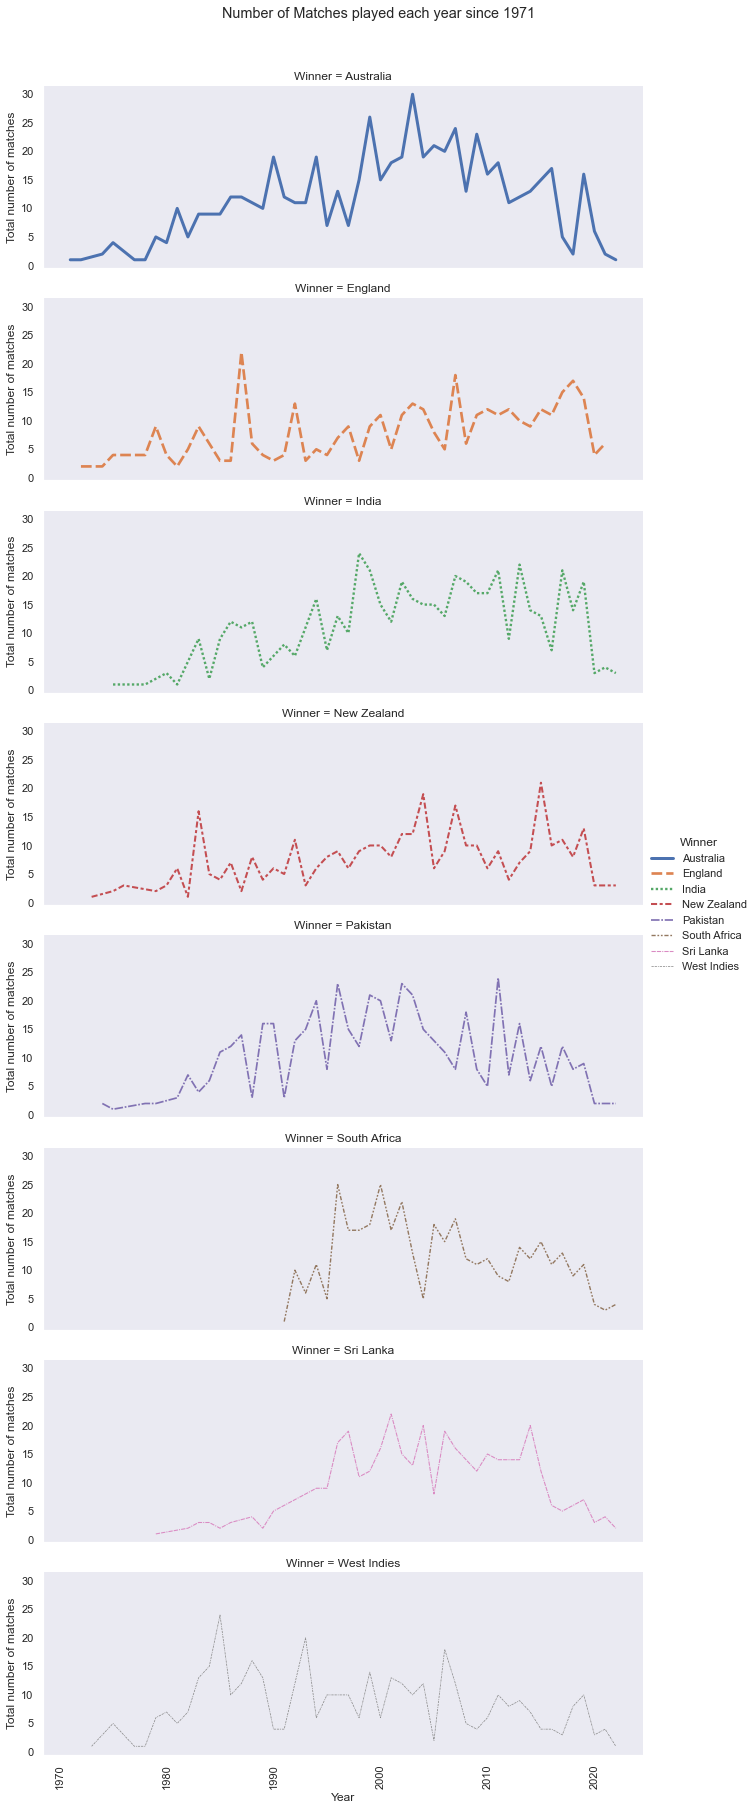

In [327]:
#Line plot showing the number of matches won by test playing nations since 1971 or team which have won 20 or more matches in a year


sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.relplot(data = df_lineplot_final, x = 'Match_Year', y = 'Number_of_wins',  kind = "line", row = 'Winner', height=3, aspect=3, linewidth = 2, 
                hue = 'Winner', style = 'Winner', size = 'Winner')
g.fig.suptitle("Number of Matches played each year since 1971", y = 1.03)
g.set(xlabel = "Year", ylabel = "Total number of matches")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

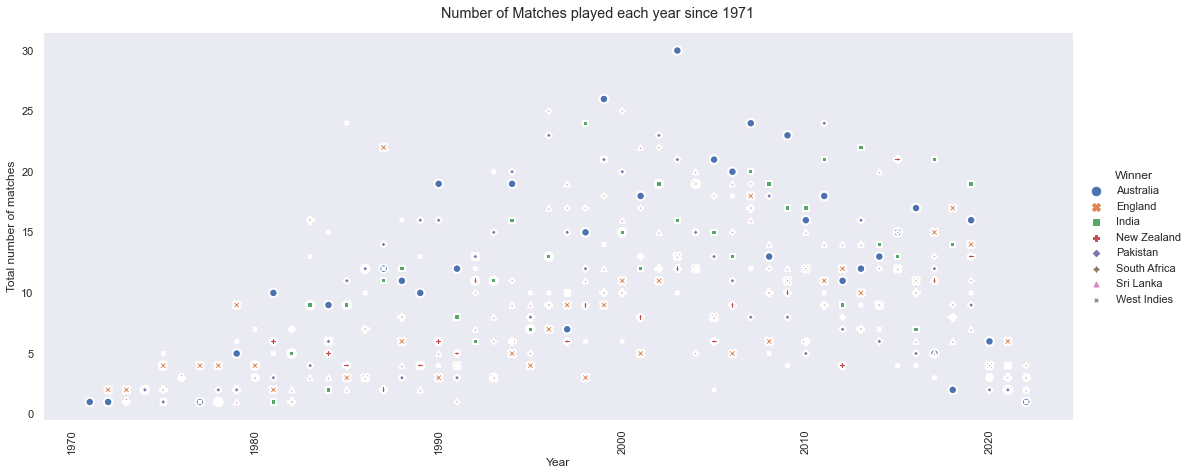

In [311]:
#Line plot showing the number of matches won by test playing nations since 1971 or team which have won 20 or more matches in a year


sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.relplot(data = df_lineplot_final, x = 'Match_Year', y = 'Number_of_wins',  kind = "scatter", height=6, aspect=15/6, linewidth = 2, 
                hue = 'Winner', style = 'Winner', size = 'Winner')
g.fig.suptitle("Number of Matches played each year since 1971", y = 1.03)
g.set(xlabel = "Year", ylabel = "Total number of matches")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

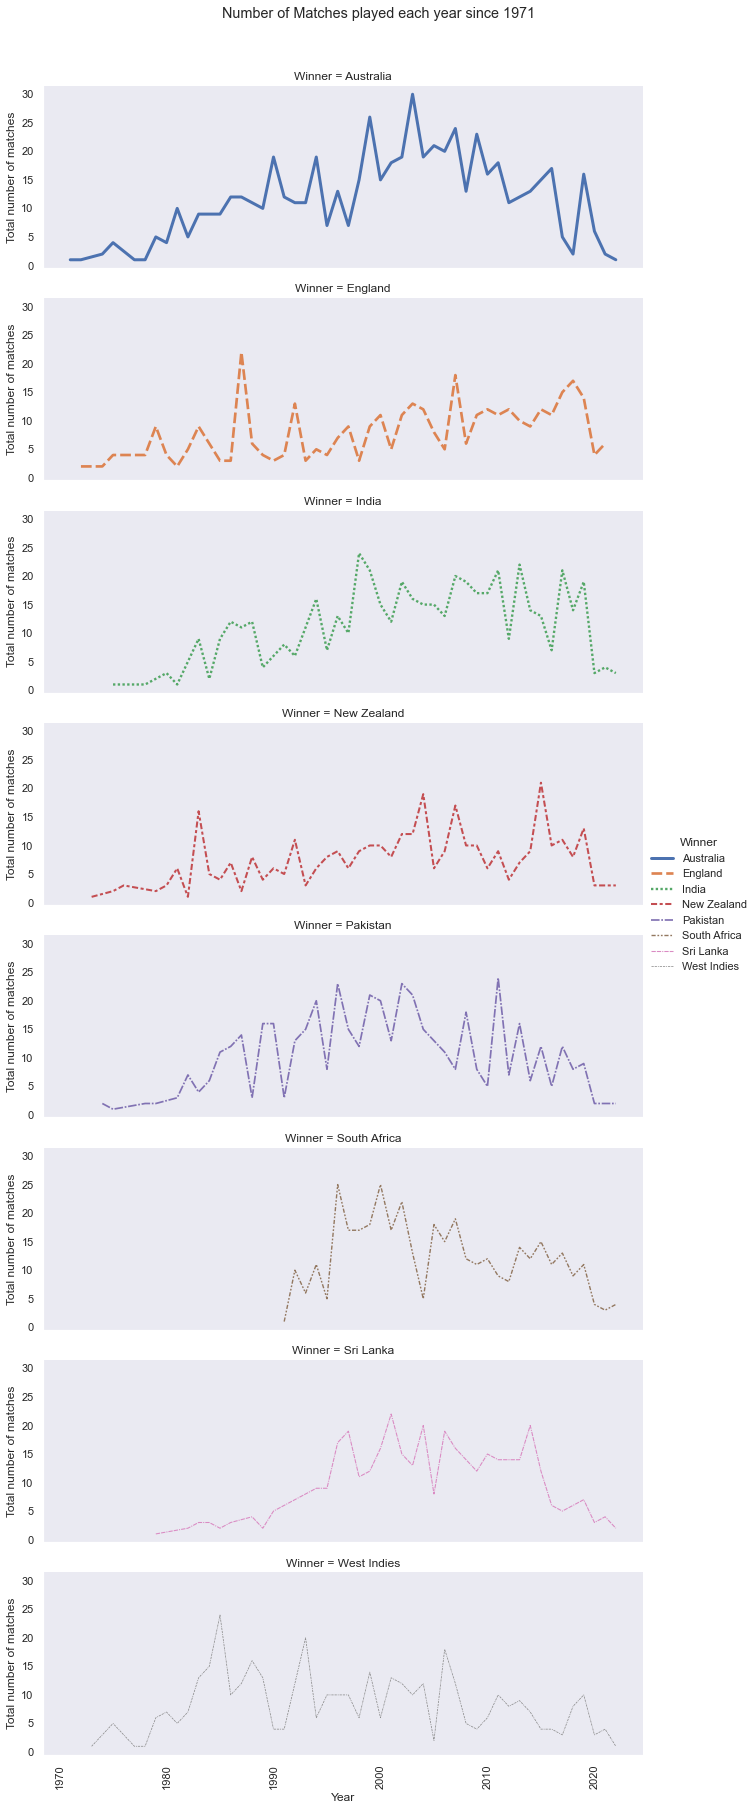

In [332]:
#Line plot showing the number of matches won by test playing nations since 1971 or team which have won 20 or more matches in a year


sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.relplot(data = df_lineplot_final, x = 'Match_Year', y = 'Number_of_wins',  kind = "line", height=3, aspect=3, linewidth = 2, 
                hue = 'Winner', style = 'Winner', size = 'Winner', row = 'Winner')
g.fig.suptitle("Number of Matches played each year since 1971", y = 1.03)
g.set(xlabel = "Year", ylabel = "Total number of matches")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

In [311]:

url = "https://stats.espncricinfo.com/ci/engine/match/1211169.html"
html = requests.get(url).content
    #Parse the data
soup = BeautifulSoup(html, 'html.parser')
#print(soup)
rows = soup.find_all("div", {"class": "ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"})
#print(rows)
detail_score =[]
#<div class="ds-flex ds-flex-col ds-mt-3 md:ds-mt-0 ds-mt-0 ds-mb-1"><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-opacity-50 ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="United Arab Emirates Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313147.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/united-arab-emirates-27" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">United Arab Emirates</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5"></span><strong class="">170</strong></div></div><div class="ci-team-score ds-flex ds-justify-between ds-items-center ds-text-typo-title ds-mb-2"><div class="ds-flex ds-items-center"><img width="32" height="32" alt="Oman Flag" style="width:32px;height:32px" class="ds-mr-2" src="https://img1.hscicdn.com/image/upload/f_auto,t_ds_square_w_160,q_50/lsci/db/PICTURES/CMS/313100/313157.logo.png"><span class="ds-inline-flex ds-items-center ds-leading-none"><a href="/team/oman-37" class="ds-text-ui-typo hover:ds-text-ui-typo-primary ds-block"><span class="ds-text-tight-l ds-font-bold">Oman</span></a></span></div><div class="ds-text-compact-m ds-text-typo-title"><span class="ds-text-compact-s ds-mr-0.5">(37.3/50 ov) </span><strong class="">171/5</strong></div></div></div>
for row in rows:
    columns = row.find_all("span", {"class": "ds-text-tight-l ds-font-bold"})
    for column in columns:
        x = column.text
        print(x)
        detail_score.append(x)
    columns1 = row.find_all("div", {"class": "ds-text-compact-m ds-text-typo-title"})
    for column in columns1:
        y = column.text
        print(y)
        detail_score.append(y)
print(detail_score)

United Arab Emirates
Oman
170
(37.3/50 ov) 171/5
['United Arab Emirates', 'Oman', '170', '(37.3/50 ov) 171/5']


In [260]:
#df_cum = df.groupby('Match_Year')['Match_Year'].value_counts().agg('cumsum').to_frame()
#df_cum = df.groupby('Match_Year')['Match_Year'].count().agg('sum').to_frame().rename(columns={'Match_Year': 'Match_count'})
df_cum = df.groupby('Match_Year')['Match_Year'].count().to_frame().rename(columns={'Match_Year': 'Match_count'})
#df.groupby('Match_Year')['Match_Year'].expanding().mean()

In [261]:
df_cum.reset_index(drop = False, inplace = True)

In [266]:
df_cum_series = df_cum['Match_count'].expanding().mean()


In [300]:
df_cum_final = pd.merge(df_cum_series, df_cum, left_index=True, right_index=True)

In [301]:
df_cum_final.rename(columns = {'Match_count_x':'Mean_Match_count', 'Match_count_y':'Total_Match'}, inplace = True)

In [303]:
df_cum_final = df_cum_final[['Match_Year', 'Mean_Match_count', 'Total_Match']]

In [335]:
df_cum_final

,Match_Year,Mean_Match_count,Total_Match
0,1971,1.000000,1
1,1972,2.000000,3
2,1973,2.666667,4
3,1974,3.500000,6
4,1975,6.200000,17
5,1976,6.166667,6
6,1977,6.142857,6
7,1978,6.500000,9
8,1979,8.555556,25
9,1980,9.800000,21


<function matplotlib.pyplot.show(close=None, block=None)>

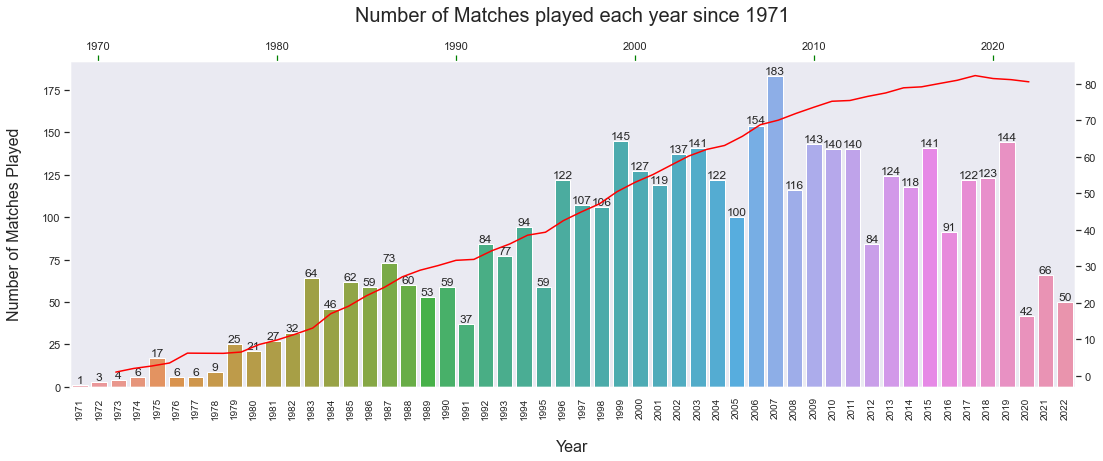

In [368]:
#count plot showing the number of matches played every year since 1971 by all teams
sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
fig, ax1 = plt.subplots(figsize=(18,6))
color = 'tab:green'
ax1.set_title('Number of Matches played each year since 1971', fontsize=20, pad = 20)
ax1 = sns.barplot(data = df_cum_final, x = 'Match_Year', y = 'Total_Match')
ax1.set_xlabel('Year', fontsize=16, labelpad = 20)
ax1.set_ylabel('Number of Matches Played', fontsize=16, labelpad = 20)
ax2 = ax1.twinx().twiny()
ax1.tick_params(axis='x')
#ax2.set_ylabel('', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90, size = 10)
ax1.bar_label(ax1.containers[0])

ax2 = sns.lineplot(x='Match_Year', y='Mean_Match_count', data = df_cum_final, sort=False, color='red')
ax2.set_ylabel('Avg number of matches played', fontsize=16, labelpad = 1)
ax2.set_xlabel('', fontsize=16, labelpad = 1)
ax2.tick_params(axis='x', color='green')
ax2.tick_params(axis='y', color='red')
#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

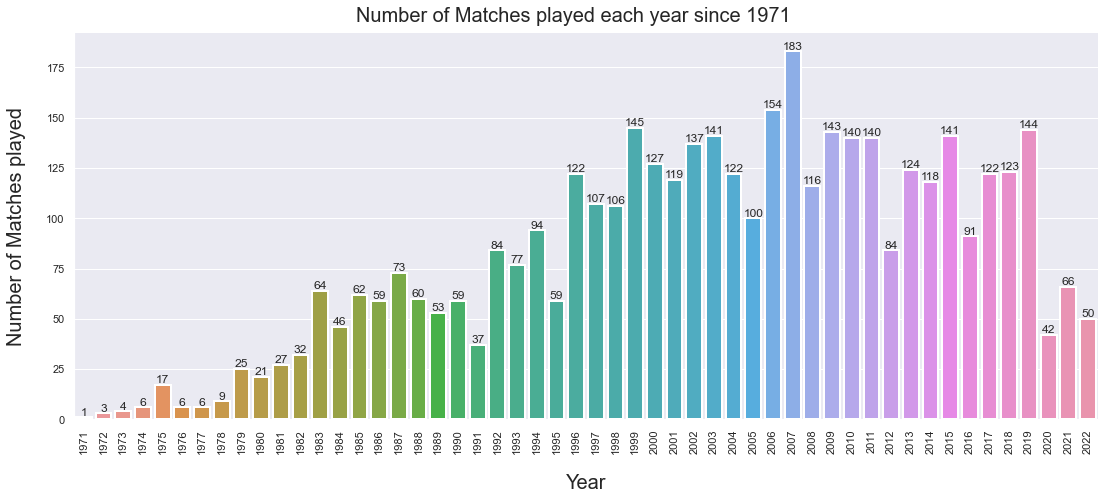

In [387]:
#count plot showing the number of matches played every year since 1971 by all teams

sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.catplot(data = df, x = 'Match_Year', kind = "count", height=6, aspect=15/6, linewidth = 2)
#To create count label on top of bar
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
g.fig.suptitle("Number of Matches played each year since 1971", y = 1.03, fontsize = 20)
#g.set(xlabel = "Year", ylabel = "Total number of matches")
plt.xlabel("Year", fontsize = 20, labelpad = 20)
plt.ylabel("Number of Matches played", fontsize = 20, labelpad = 20)
plt.xticks(rotation = 90)

#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

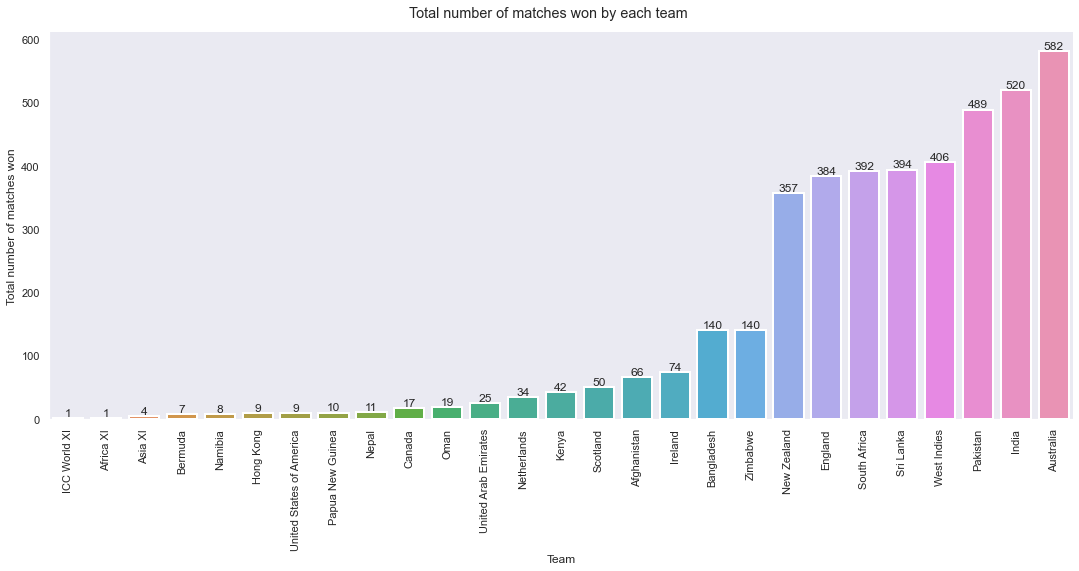

In [391]:
#count plot showing the total number of matches won by every team since 1971

sns.set_style("dark") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.catplot(data = df, x = df['Winner'] , kind = "count", height=6, aspect=15/6, linewidth = 2, order = reversed(df['Winner'].value_counts().index) )
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
g.fig.suptitle("Total number of matches won by each team", y = 1.03)
g.set(xlabel = "Team", ylabel = "Total number of matches won")
plt.xticks(rotation = 90)

#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

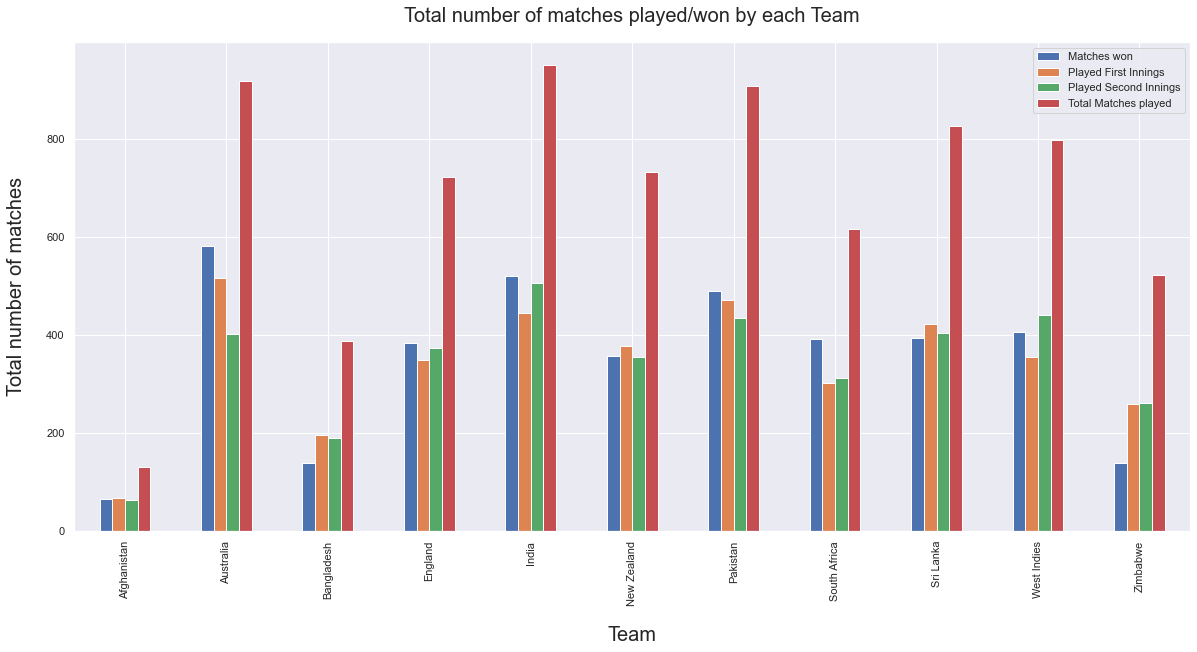

In [230]:
#Grouped Bar plot showing the number of matches played/won/first_innings/second_innings every year since 1971

sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
#sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
#g = sns.catplot(data = df_total, x = 'Team', y='Winner', kind = "bar", height=6, aspect=15/6, linewidth = 2)
#g = sns.catplot(data = df_total, x = 'Team', y='First_Innings_Team', kind = "bar", height=6, aspect=15/6, linewidth = 2)
g = df_total_test_playing.plot(x= 'Team', y=['Winner_count', 'First_Innings_count', 'Second_Innings_count', 'Total_match'], figsize = (20,9), kind = 'bar', stacked = False)

#g.set(xlabel = "Team", ylabel = "Total number of matches")
g.set_xlabel(xlabel = 'Team', labelpad = 20, fontsize = 20)
g.set_ylabel(ylabel = 'Total number of matches', labelpad = 20, fontsize = 20)
g.set_title("Total number of matches played/won by each Team", pad = 20, fontsize = 20)
plt.xticks(rotation = 90)
g.legend(['Matches won', 'Played First Innings', 'Played Second Innings', 'Total Matches played'])

#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

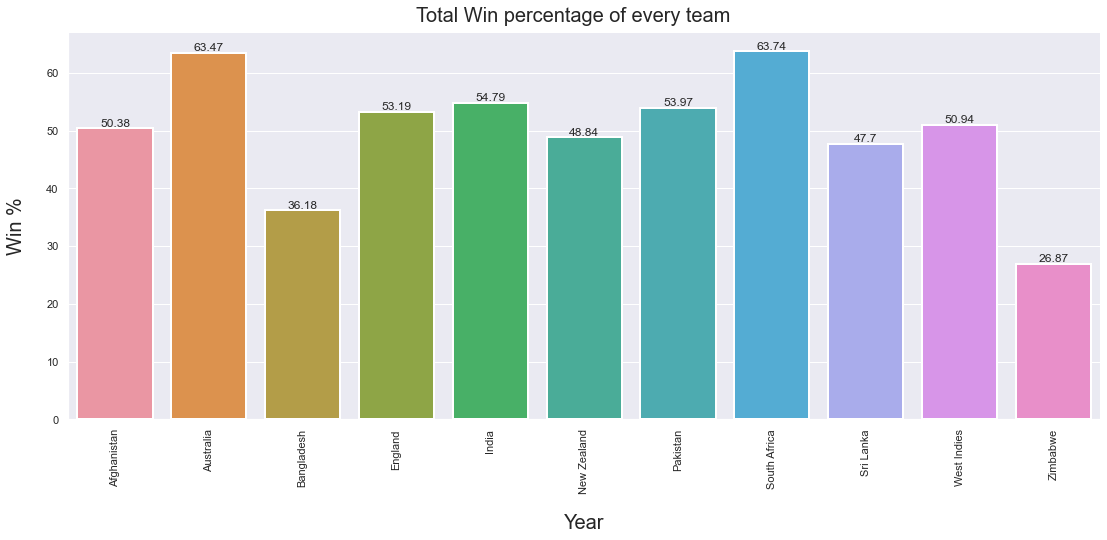

In [417]:
#bar plot showing the win percentage of every team

sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
g = sns.catplot(data = df_total_test_playing, x = 'Team',  y = 'Win_percentage',kind = "bar", height=6, aspect=15/6, linewidth = 2)
#To create count label on top of bar
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
g.fig.suptitle("Total Win percentage of every team", y = 1.03, fontsize = 20)
#g.set(xlabel = "Year", ylabel = "Total number of matches")
plt.xlabel("Year", fontsize = 20, labelpad = 20)
plt.ylabel("Win %", fontsize = 20, labelpad = 20)
plt.xticks(rotation = 90)

#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

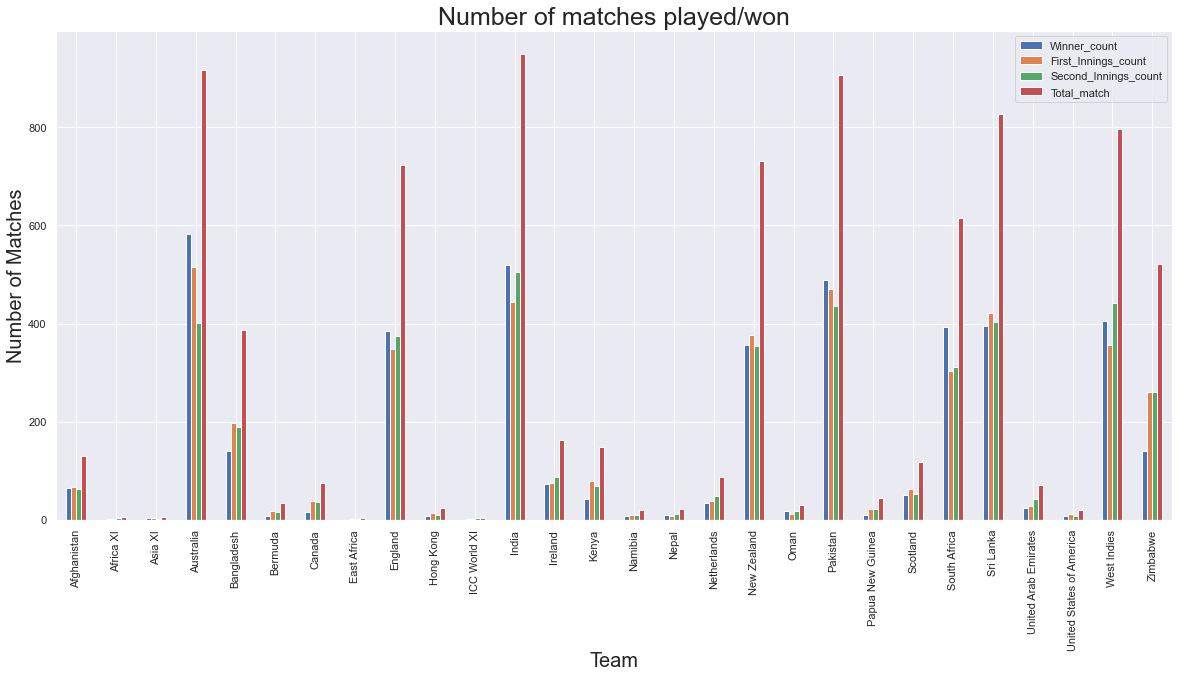

In [229]:
#bar plot showing the number of matches played every year since 1971 including non test playing countries

sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
#g = sns.catplot(data = df_total, x = 'Team', y='Winner', kind = "bar", height=6, aspect=15/6, linewidth = 2)
#g = sns.catplot(data = df_total, x = 'Team', y='First_Innings_Team', kind = "bar", height=6, aspect=15/6, linewidth = 2)
g = df_total.plot(x= 'Team', y=['Winner_count', 'First_Innings_count', 'Second_Innings_count', 'Total_match'], figsize = (20,9), kind = 'bar', stacked = False)

#g.set(xlabel = "Team", ylabel = "Total number of matches", size = 20)
g.set_xlabel(xlabel = "Team", fontsize = 20, labelpad = 1)
g.set_ylabel(ylabel = "Number of Matches", fontsize = 20, labelpad = 2)
g.set_title("Number of matches played/won", fontsize = 25)
plt.xticks(rotation = 90)

#plt.grid()
plt.show

In [21]:
df_first_innings = df.groupby(['Match_Year'])['First_Innings_Team'].value_counts().to_frame().rename(columns={'First_Innings_Team': 'First_Innings_Count'})

In [22]:
df_first_innings.reset_index(drop = False, inplace = True)

In [23]:
df_first_innings.head()

,Match_Year,First_Innings_Team,First_Innings_Count
0,1971,England,1
1,1972,Australia,2
2,1972,England,1
3,1973,New Zealand,2
4,1973,England,1


In [24]:
#df.groupby(['Match_Year', 'Second_Innings_Team'])['Second_Innings_Team'].value_counts()
df_second_innings = df.groupby(['Match_Year'])['Second_Innings_Team'].value_counts().to_frame().rename(columns={'Second_Innings_Team': 'Second_Innings_Count'})

In [25]:
df_second_innings.reset_index(drop = False, inplace = True)

In [26]:
df_second_innings.head()

,Match_Year,Second_Innings_Team,Second_Innings_Count
0,1971,Australia,1
1,1972,England,2
2,1972,Australia,1
3,1973,England,2
4,1973,Pakistan,1


In [27]:
#df_first_innings = df_first_innings.iloc[:, 1:]

In [28]:
df_first_innings.columns = ['Match_Year', 'Team', 'Match_Count']

In [29]:
df_first_innings.head()

,Match_Year,Team,Match_Count
0,1971,England,1
1,1972,Australia,2
2,1972,England,1
3,1973,New Zealand,2
4,1973,England,1


In [30]:
df_second_innings.columns = ['Match_Year', 'Team', 'Match_Count']

In [31]:
df_second_innings.head()

,Match_Year,Team,Match_Count
0,1971,Australia,1
1,1972,England,2
2,1972,Australia,1
3,1973,England,2
4,1973,Pakistan,1


In [32]:
df_temp_complete = df_first_innings.append(df_second_innings)

In [33]:
df_temp_complete = df_temp_complete.groupby(['Match_Year', 'Team'])['Match_Count'].sum().to_frame()

In [34]:
df_temp_complete.reset_index(drop = False, inplace = True)

In [35]:
df_temp_complete

,Match_Year,Team,Match_Count
0,1971,Australia,1
1,1971,England,1
2,1972,Australia,3
3,1972,England,3
4,1973,England,3
...,...,...,...
577,2022,South Africa,6
578,2022,Sri Lanka,3
579,2022,United Arab Emirates,10
580,2022,West Indies,6


In [36]:
df_temp_complete[df_temp_complete['Match_Year'] == 2022].groupby('Match_Year').sum()

,Match_Count
Match_Year,
2022,100


In [37]:
df_temp_complete.query('Match_Year == 1972')

,Match_Year,Team,Match_Count
2,1972,Australia,3
3,1972,England,3


In [38]:
#df.groupby(['Match_Year', 'Second_Innings_Team'])['Second_Innings_Team'].value_counts()
df_winner_count = df.groupby(['Match_Year'])['Winner'].value_counts().to_frame().rename(columns={'Winner': 'Winner_count'})
df_winner_count.reset_index(drop = False, inplace = True)

In [39]:
df_winner_count.columns = ['Match_Year', 'Team', 'Winner_count']

In [40]:
df_winner_count.query('Match_Year == 1972')

,Match_Year,Team,Winner_count
1,1972,England,2
2,1972,Australia,1


In [41]:
#df_full = pd.concat([df_temp_complete, df_winner_count], axis=1)
df_full = pd.merge(df_temp_complete, df_winner_count, on=['Match_Year', 'Team'], how='left')

In [42]:
df_full.query('Match_Year == 1973')

,Match_Year,Team,Match_Count,Winner_count
4,1973,England,3,2.0
5,1973,New Zealand,2,1.0
6,1973,Pakistan,1,NaN
7,1973,West Indies,2,1.0


In [43]:
 df_full['Winner_count'].fillna(0, inplace = True)

In [44]:
 df_full['Winner_count'] =  df_full['Winner_count'].astype('int64')

In [45]:
df_full.head(20)

,Match_Year,Team,Match_Count,Winner_count
0,1971,Australia,1,1
1,1971,England,1,0
2,1972,Australia,3,1
3,1972,England,3,2
4,1973,England,3,2
5,1973,New Zealand,2,1
6,1973,Pakistan,1,0
7,1973,West Indies,2,1
8,1974,Australia,2,2
9,1974,England,4,2


In [46]:
df_full['Win_percent'] = df_full.apply(
    lambda row: 0 if row.Winner_count == 0 else (row.Winner_count /row.Match_Count) * 100 , axis=1).round(2)

,Match_Year,Team,Match_Count,Winner_count,Win_percent
0,1971,Australia,1,1,100.00
1,1971,England,1,0,0.00
2,1972,Australia,3,1,33.33
3,1972,England,3,2,66.67
4,1973,England,3,2,66.67
...,...,...,...,...,...
577,2022,South Africa,6,4,66.67
578,2022,Sri Lanka,3,2,66.67
579,2022,United Arab Emirates,10,7,70.00
580,2022,West Indies,6,1,16.67


In [66]:
df_full.Team.unique()

array(['Australia', 'England', 'New Zealand', 'Pakistan', 'West Indies',
       'India', 'East Africa', 'Sri Lanka', 'Canada', 'Zimbabwe',
       'Bangladesh', 'South Africa', 'United Arab Emirates', 'Kenya',
       'Netherlands', 'Scotland', 'Namibia', 'Hong Kong',
       'United States of America', 'Africa XI', 'Asia XI', 'ICC World XI',
       'Bermuda', 'Ireland', 'Afghanistan', 'Papua New Guinea', 'Nepal',
       'Oman'], dtype=object)

In [85]:
df_full.head()

,Match_Year,Team,Match_Count,Winner_count,Win_percent
0,1971,Australia,1,1,100.00
1,1971,England,1,0,0.00
2,1972,Australia,3,1,33.33
3,1972,England,3,2,66.67
4,1973,England,3,2,66.67


<function matplotlib.pyplot.show(close=None, block=None)>

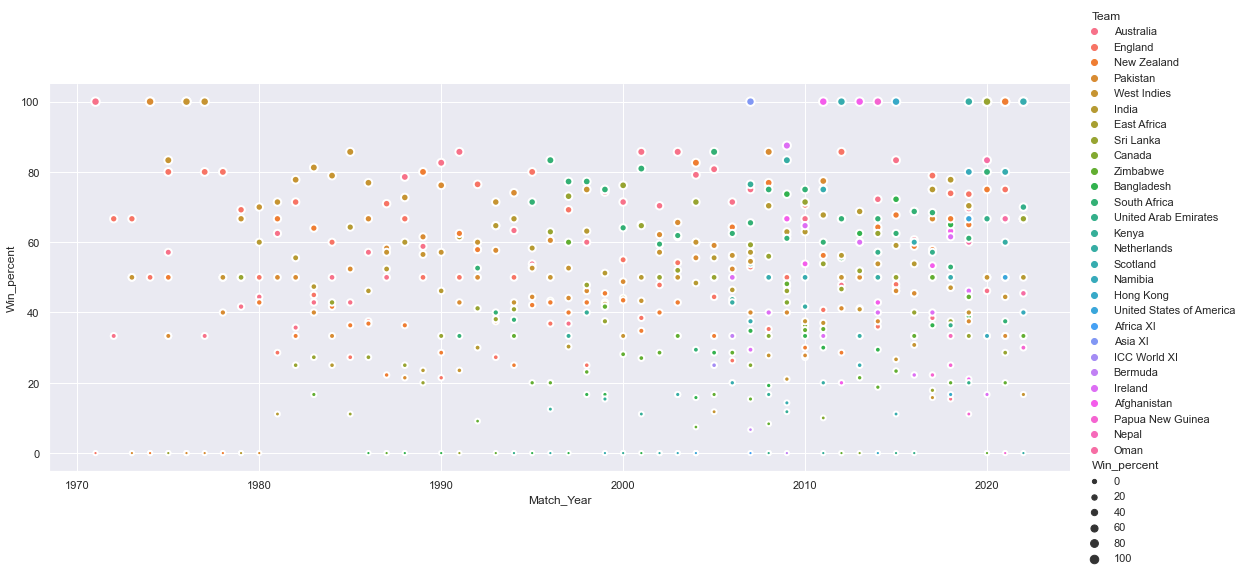

In [95]:
#bar plot showing the win percentage of every team

sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
# set the figure size
#plt.figure(figsize=(200, 14))
#df_full.plot(kind='bar', stacked=False,  x = 'Match_Year', y = 'Win_percent', figsize = (100, 50))
#g = df_full.set_index(['Match_Year', 'Team']).plot( y=['Win_percent'], figsize = (20,9), kind = 'line', stacked = False)
g = sns.relplot(data = df_full, x = 'Match_Year',  y = 'Win_percent',kind = "scatter", height=6, aspect=15/6, linewidth = 2, hue = 'Team', size = 'Win_percent')


#plt.grid()
plt.show

In [411]:
df_full.query('Match_Year == 2012').head(20)

,Match_Year,Team,Match_Count,Winner_count,Win_percent
392,2012,Afghanistan,5,1,20.00
393,2012,Australia,23,11,47.83
394,2012,Bangladesh,9,5,55.56
395,2012,Canada,1,0,0.00
396,2012,England,14,12,85.71
397,2012,India,16,9,56.25
398,2012,Ireland,3,2,66.67
399,2012,Kenya,2,1,50.00
400,2012,Netherlands,2,1,50.00
401,2012,New Zealand,14,4,28.57


In [198]:
Test_playing_list = ['England',
 'Australia',
 'New Zealand',
 'Pakistan',
 'India',
 'West Indies',
 'South Africa']

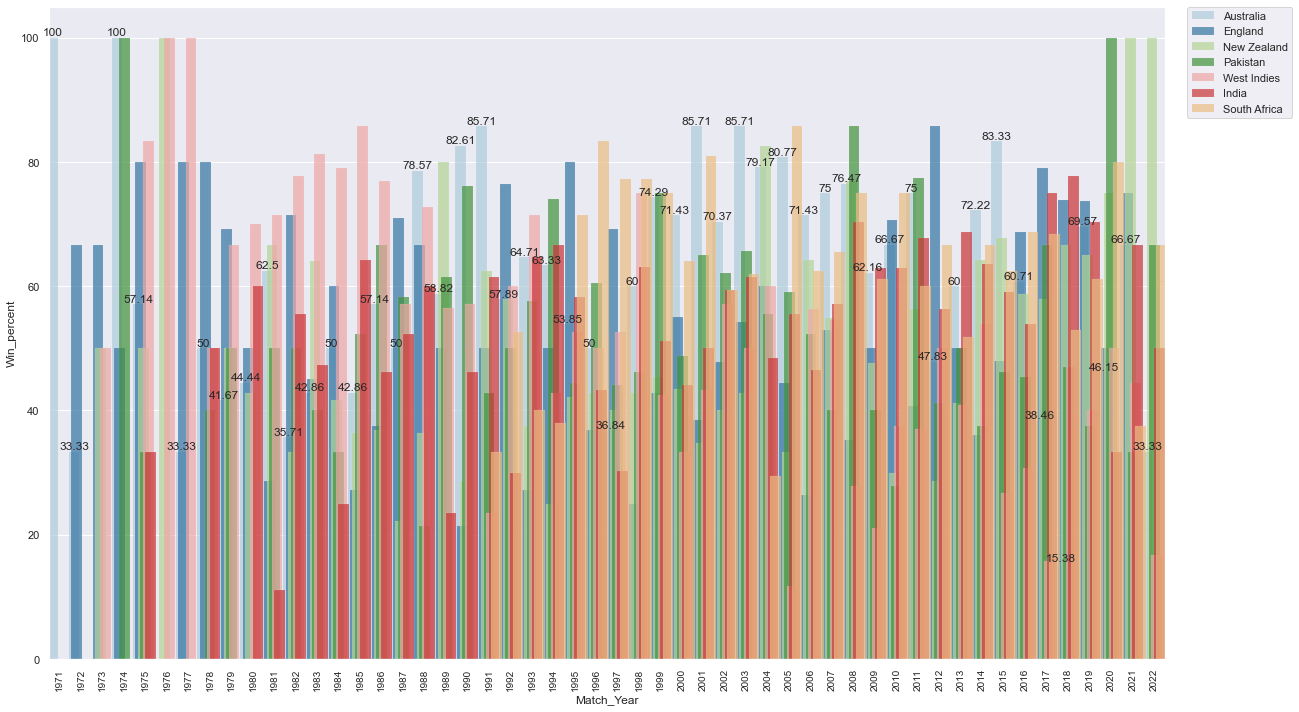

In [419]:
# Set the figure size
fig, ax = plt.subplots(figsize=(20, 12))
sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster

# plot a bar chart
g = sns.barplot(
    y="Win_percent", 
    x="Match_Year", 
    data=df_full[df_full['Team'].isin(Test_playing_list)], 
    #estimator=sum, 
    ci=None,
    color='red',
    dodge=True,
    ax = ax,
    #palette = 'hls',
    #linewidth=2.5,
    palette = sns.color_palette('Paired'), 
    lw = 0.1,
    alpha = 0.7, #for bar transparency
    #width = 8,
hue = 'Team')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff /2)

change_width(ax, 0.5)

g.bar_label(g.containers[0])



#print(type(g))
g.set_xticklabels(g.get_xticklabels(),rotation = 90, size = 10)
#g.legend()
g.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

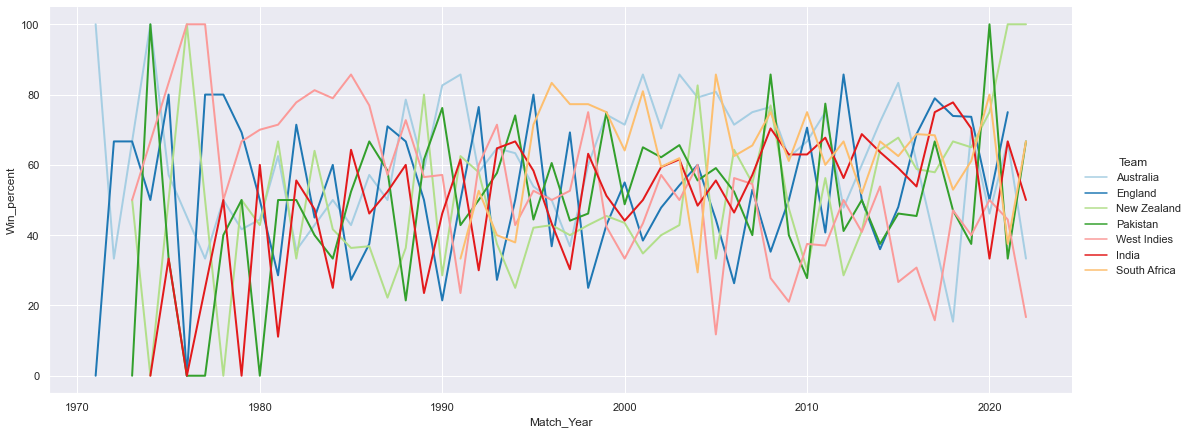

In [206]:
#bar plot showing the win percentage of every team

sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
# set the figure size
#plt.figure(figsize=(200, 14))
#df_full.plot(kind='bar', stacked=False,  x = 'Match_Year', y = 'Win_percent', figsize = (100, 50))
#g = df_full.set_index(['Match_Year', 'Team']).plot( y=['Win_percent'], figsize = (20,9), kind = 'line', stacked = False)
g = sns.relplot(data = df_full[df_full['Team'].isin(Test_playing_list)], x = 'Match_Year',  palette = sns.color_palette('Paired', 7),
                y = 'Win_percent',kind = "line", height=6, aspect=15/6, linewidth = 2, hue = 'Team')


#plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

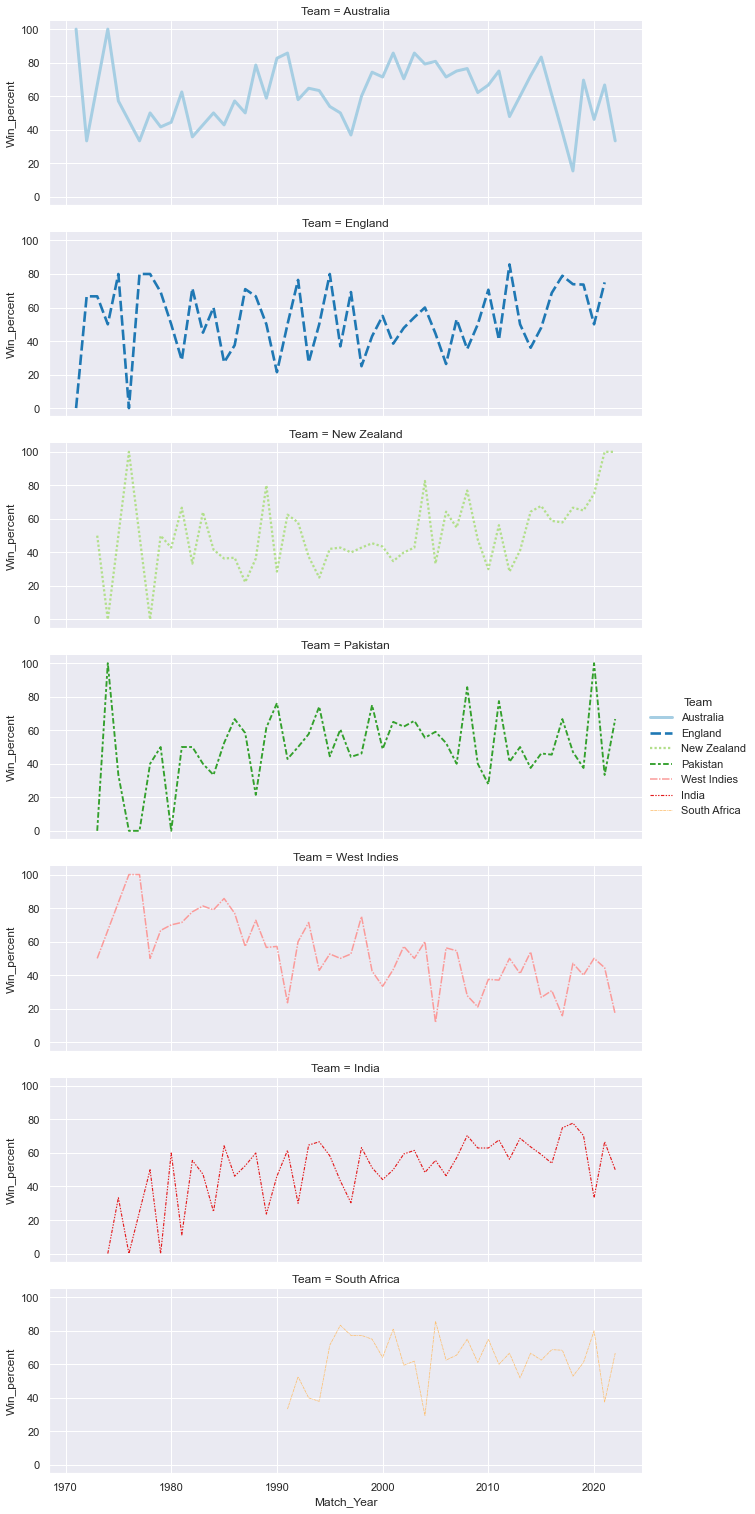

In [331]:
#bar plot showing the win percentage of every team

sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("notebook") #paper, notebook, talk, poster
#sns.set(rc = {'figure.figsize':(200,100)})
# set the figure size
#plt.figure(figsize=(200, 14))
#df_full.plot(kind='bar', stacked=False,  x = 'Match_Year', y = 'Win_percent', figsize = (100, 50))
#g = df_full.set_index(['Match_Year', 'Team']).plot( y=['Win_percent'], figsize = (20,9), kind = 'line', stacked = False)
g = sns.relplot(data = df_full[df_full['Team'].isin(Test_playing_list)], x = 'Match_Year',  palette = sns.color_palette('Paired', 7),
                y = 'Win_percent',kind = "line", height=3, aspect=3, linewidth = 4, hue = 'Team', row = 'Team', style = 'Team', size = 'Team')


#plt.grid()
plt.show

C:\Users\Atif\anaconda3\lib\site-packages\seaborn\categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

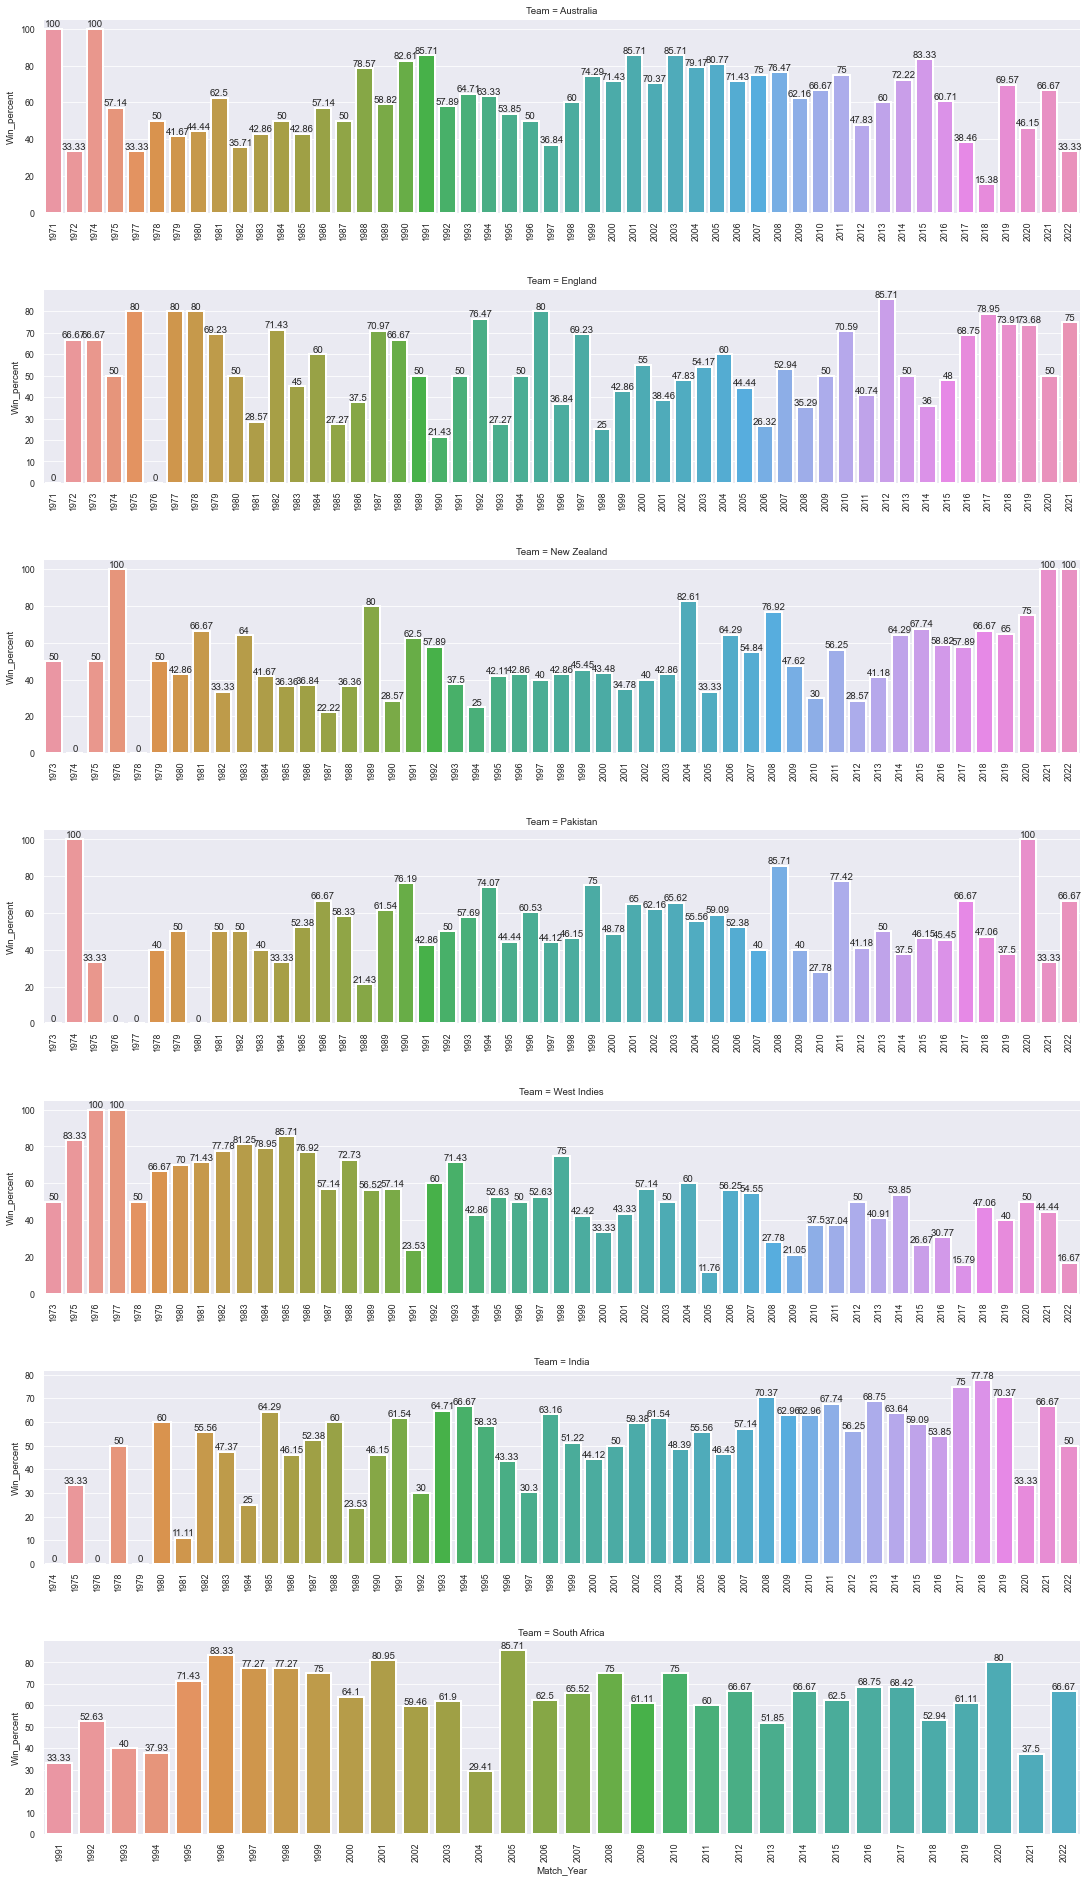

In [421]:
#bar plot showing the win percentage of every team
#fig.tight_layout()
sns.set_style("darkgrid") #darkgrid, whitegrid, dark, white, ticks
sns.set_context("paper") #paper, notebook, talk, poster

#sns.set(rc = {'figure.figsize':(200,100)})
# set the figure size
#plt.figure(figsize=(2000, 14))
#df_full.plot(kind='bar', stacked=False,  x = 'Match_Year', y = 'Win_percent', figsize = (100, 50))
#fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#g = df_full.set_index(['Match_Year', 'Team']).plot( y=['Win_percent'], figsize = (20,9), kind = 'line', stacked = False)
g = sns.catplot(data = df_full[df_full['Team'].isin(Test_playing_list)], x = 'Match_Year',  #palette = sns.color_palette('Paired', 7),
                y = 'Win_percent',kind = "bar", height=4, aspect=4, linewidth = 2, row = 'Team', orient="v", sharex=False, sharey=False, dodge = False #facet_kws={'sharey':False, 'sharex':False}
               )

for ax in g.axes.flat:  
    ax.tick_params(axis='x', labelrotation=90)
    ax.bar_label(ax.containers[0])

#g.set_xticklabels(rotation = 90)


#for ax in g.axes.flat:
    #plt.setp(ax.get_xticklabels(), visible = True, rotation = 45)
 #   ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, size = 10, visible = False, ha="right")

'''for ax in g.axes:
    g.set_xticklabels(ax.get_xticklabels())
    g.set_ylabels('product count')

for ax in g.axes.flat:  # iterate through each subplot
    labels = ax._xticklabels()  # get the position and text for each subplot
    print(labels)
    for label in labels:
        x, _ = label.get_position()  # extract the y tick position
        txt = label.get_text()  # extract the text
        #txt = f'({x + 1}) {txt}'  # update the text string
        label.set_text(txt)  # set the text
        print(txt)'''

plt.xticks(rotation = 90)
#plt.rcParams['figure.constrained_layout.use'] = False
plt.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1, wspace=0.4, hspace=0.4)



#plt.grid()

plt.show

###  Convert to Pivot wide form and then plot bar graph

In [427]:
df_full.head()

,Match_Year,Team,Match_Count,Winner_count,Win_percent
0,1971,Australia,1,1,100.00
1,1971,England,1,0,0.00
2,1972,Australia,3,1,33.33
3,1972,England,3,2,66.67
4,1973,England,3,2,66.67


In [434]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 581
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Match_Year    582 non-null    int64  
 1   Team          582 non-null    object 
 2   Match_Count   582 non-null    int64  
 3   Winner_count  582 non-null    int64  
 4   Win_percent   582 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 43.4+ KB


In [529]:
#df_full[df_full['Team'].isin(Test_playing_list)]
df_full.loc[df_full['Team'] == 'England', 'Team'].head()

1     England
3     England
4     England
9     England
15    England
Name: Team, dtype: object

In [533]:
df_full.query('Team == "South Africa"').head()

,Match_Year,Team,Match_Count,Winner_count,Win_percent
129,1991,South Africa,3,1,33.33
137,1992,South Africa,19,10,52.63
146,1993,South Africa,15,6,40.00
155,1994,South Africa,29,11,37.93
166,1995,South Africa,7,5,71.43


In [534]:
df_full.loc[df_full['Team'].isin(Test_playing_list),['Match_Year', 'Team', 'Win_percent']].pivot(index = 'Match_Year', columns = ['Team'] ,values = ['Win_percent']).fillna(0)

Win_percent                                                             
Team         Australia England  India New Zealand Pakistan South Africa West Indies
Match_Year                                                                         
1971            100.00    0.00   0.00        0.00     0.00         0.00        0.00
1972             33.33   66.67   0.00        0.00     0.00         0.00        0.00
1973              0.00   66.67   0.00       50.00     0.00         0.00       50.00
1974            100.00   50.00   0.00        0.00   100.00         0.00        0.00
1975             57.14   80.00  33.33       50.00    33.33         0.00       83.33
1976              0.00    0.00   0.00      100.00     0.00         0.00      100.00
1977             33.33   80.00   0.00        0.00     0.00         0.00      100.00
1978             50.00   80.00  50.00        0.00    40.00         0.00       50.00
1979             41.67   69.23   0.00       50.00    50.00         0.00       66.67
1980             44.44   50.00  60.00       42.86     0.00         0.00       70.00
1981             62.50   28.57  11.11       66.67    50.00         0.00       71.43
1982             35.71   71.43  55.56       33.33    50.00         0.00       77.78
1983             42.86   45.00  47.37       64.00    40.00         0.00       81.25
1984             50.00   60.00  25.00       41.67    33.33         0.00       78.95
1985             42.86   27.27  64.29       36.36    52.38         0.00       85.71
1986             57.14   37.50  46.15       36.84    66.67         0.00       76.92
1987             50.00   70.97  52.38       22.22    58.33         0.00       57.14
1988             78.57   66.67  60.00       36.36    21.43         0.00       72.73
1989             58.82   50.00  23.53       80.00    61.54         0.00       56.52
1990             82.61   21.43  46.15       28.57    76.19         0.00       57.14
1991             85.71   50.00  61.54       62.50    42.86        33.33       23.53
1992             57.89   76.47  30.00       57.89    50.00        52.63       60.00
1993             64.71   27.27  64.71       37.50    57.69        40.00       71.43
1994             63.33   50.00  66.67       25.00    74.07        37.93       42.86
1995             53.85   80.00  58.33       42.11    44.44        71.43       52.63
1996             50.00   36.84  43.33       42.86    60.53        83.33       50.00
1997             36.84   69.23  30.30       40.00    44.12        77.27       52.63
1998             60.00   25.00  63.16       42.86    46.15        77.27       75.00
1999             74.29   42.86  51.22       45.45    75.00        75.00       42.42
2000             71.43   55.00  44.12       43.48    48.78        64.10       33.33
2001             85.71   38.46  50.00       34.78    65.00        80.95       43.33
2002             70.37   47.83  59.38       40.00    62.16        59.46       57.14
2003             85.71   54.17  61.54       42.86    65.62        61.90       50.00
2004             79.17   60.00  48.39       82.61    55.56        29.41       60.00
2005             80.77   44.44  55.56       33.33    59.09        85.71       11.76
2006             71.43   26.32  46.43       64.29    52.38        62.50       56.25
2007             75.00   52.94  57.14       54.84    40.00        65.52       54.55
2008             76.47   35.29  70.37       76.92    85.71        75.00       27.78
2009             62.16   50.00  62.96       47.62    40.00        61.11       21.05
2010             66.67   70.59  62.96       30.00    27.78        75.00       37.50
2011             75.00   40.74  67.74       56.25    77.42        60.00       37.04
2012             47.83   85.71  56.25       28.57    41.18        66.67       50.00
2013             60.00   50.00  68.75       41.18    50.00        51.85       40.91
2014             72.22   36.00  63.64       64.29    37.50        66.67       53.85
2015             83.33   48.00  59.09       67.74    46.15     

In [535]:
df_full_pivot = df_full.loc[df_full['Team'].isin(Test_playing_list),['Match_Year', 'Team', 'Win_percent']].pivot(index = 'Match_Year', columns = ['Team'] ,values = ['Win_percent']).fillna(0)

In [536]:
df_full_pivot.head()

Win_percent                                                             
Team         Australia England  India New Zealand Pakistan South Africa West Indies
Match_Year                                                                         
1971            100.00    0.00   0.00         0.0     0.00          0.0        0.00
1972             33.33   66.67   0.00         0.0     0.00          0.0        0.00
1973              0.00   66.67   0.00        50.0     0.00          0.0       50.00
1974            100.00   50.00   0.00         0.0   100.00          0.0        0.00
1975             57.14   80.00  33.33        50.0    33.33          0.0       83.33

In [498]:
sorted(df_full.Team.unique())

['Afghanistan',
 'Africa XI',
 'Asia XI',
 'Australia',
 'Bangladesh',
 'Bermuda',
 'Canada',
 'East Africa',
 'England',
 'Hong Kong',
 'ICC World XI',
 'India',
 'Ireland',
 'Kenya',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Oman',
 'Pakistan',
 'Papua New Guinea',
 'Scotland',
 'South Africa',
 'Sri Lanka',
 'United Arab Emirates',
 'United States of America',
 'West Indies',
 'Zimbabwe']

df_full_pivot.columns = ['Afghanistan',
 'Africa XI',
 'Asia XI',
 'Australia',
 'Bangladesh',
 'Bermuda',
 'Canada',
 'East Africa',
 'England',
 'Hong Kong',
 'ICC World XI',
 'India',
 'Ireland',
 'Kenya',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Oman',
 'Pakistan',
 'Papua New Guinea',
 'Scotland',
 'South Africa',
 'Sri Lanka',
 'United Arab Emirates',
 'United States of America',
 'West Indies',
 'Zimbabwe']

In [539]:
df_full_pivot.columns = sorted(Test_playing_list)

In [540]:
df_full_pivot.head()

,Australia,England,India,New Zealand,Pakistan,South Africa,West Indies
Match_Year,,,,,,,
1971,100.00,0.00,0.00,0.0,0.00,0.0,0.00
1972,33.33,66.67,0.00,0.0,0.00,0.0,0.00
1973,0.00,66.67,0.00,50.0,0.00,0.0,50.00
1974,100.00,50.00,0.00,0.0,100.00,0.0,0.00
1975,57.14,80.00,33.33,50.0,33.33,0.0,83.33


In [541]:
df_full.query('Team == "South Africa"').head()

,Match_Year,Team,Match_Count,Winner_count,Win_percent
129,1991,South Africa,3,1,33.33
137,1992,South Africa,19,10,52.63
146,1993,South Africa,15,6,40.00
155,1994,South Africa,29,11,37.93
166,1995,South Africa,7,5,71.43


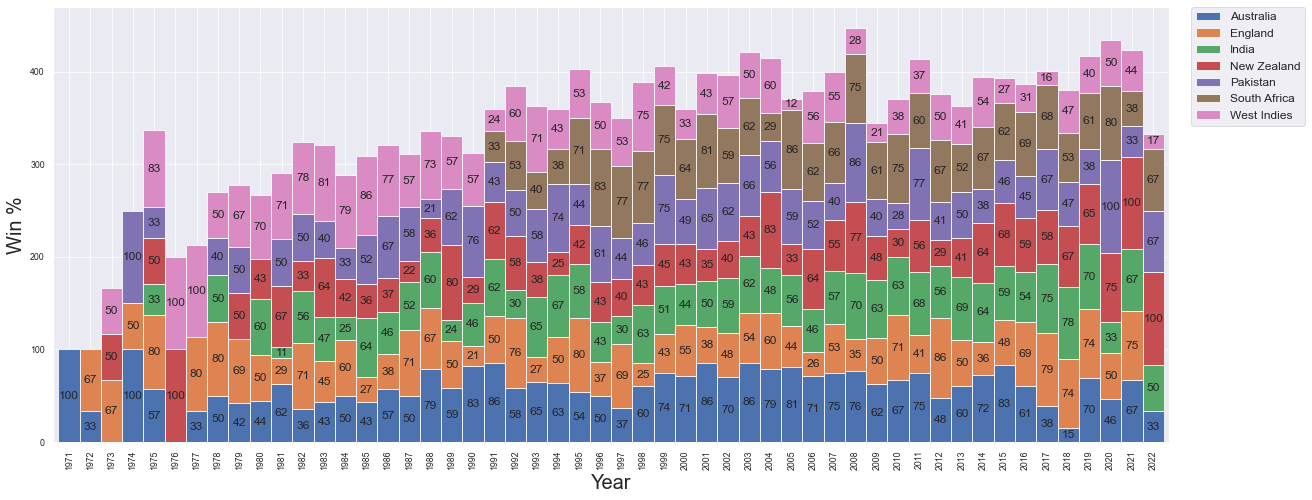

In [578]:


sns.set_style("darkgrid")
ax = df_full_pivot.plot(kind='bar',  stacked=True, figsize=(20,8), width = 1, align='center')
#plt.xticks('Match_Year')
plt.ylabel('Win %' , fontsize = 20)
plt.xlabel('Year', fontsize = 20)
for container in ax.containers:
    plt.setp(container, width=1)

#for c in ax.containers:
#    ax.bar_label(c, label_type = 'center')
    #ax.text(fontsize = 20)

for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

#ax.set_axisbelow(True)
#ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.6)
#plt.legend(['NA', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop={'size': 12})
plt.show()